<a href="https://colab.research.google.com/github/shawngobrzy/The-affect-of-Sleep-of-Glycemic-Levels/blob/main/CS_620_Data_Science_Project_Shawn_Bryant_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The effects of sleep on glucose levels in adults and children**

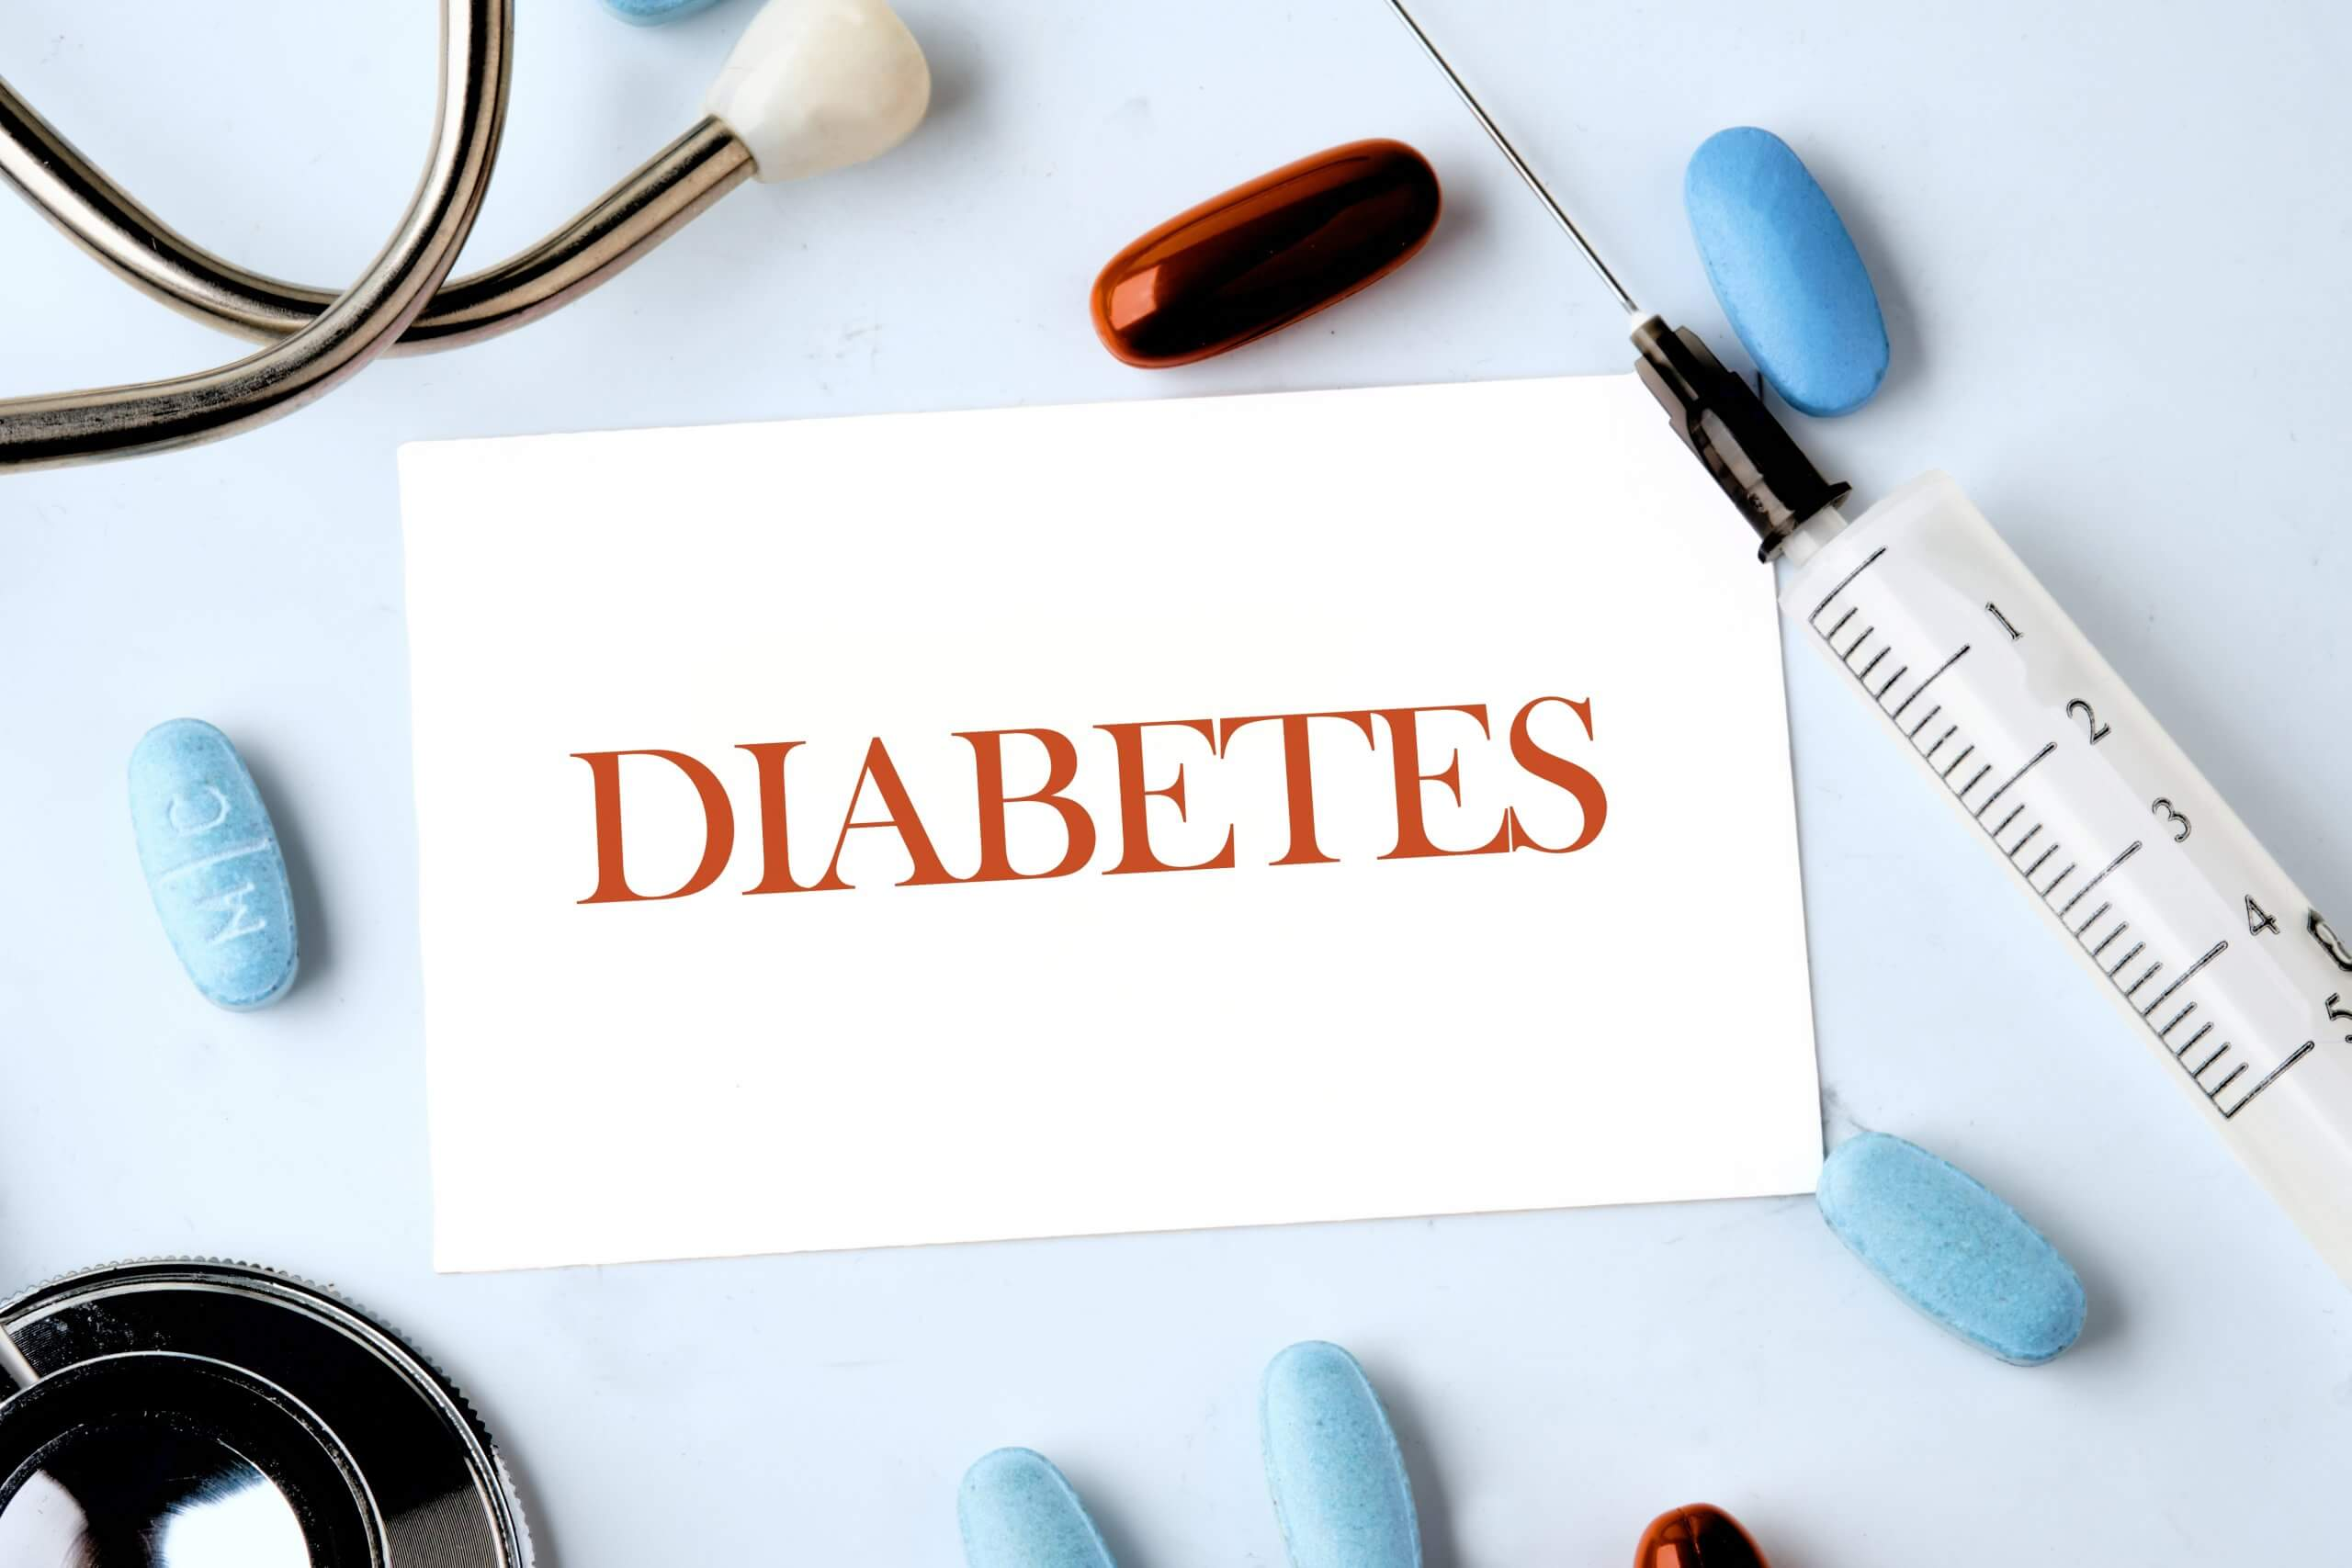

#**Table of Contents**

* **Abstract**
* **Contact Info**
* **Dataset**
* **Project Plan**
* **Project**
  * **Data Distribution**
  * **Preliminary Data Visualization**
  * **Data Cleaning and Wrangling**
  * **Data Visualizations**
* **Conclusion**
* **Summary**
* **Video Presentation**
* **References**




#**Abstract:**
Diabetes is a common disease that has increased by almost 20% from 2012 to 2022. It is a chronic disease that prevents the body from producing insulin or using it properly and causes abnormal metabolism of carbohydrates and can lead to more serious health problems such as heart disease, vision loss, and kidney disease. Because of the exponential rise of Diabetes, and lack of a cure, stopping the increase of diabetes cases has become a main priority in modern day health science. Obesity, lack of physical activity, and genetics are some of the documented leading causes of diabetes. However, one factor continues to fall under the radar year after year and that is sleep. Rest is siginicant factor to the cause of diabetes because poor sleep quality can and will affect glucose levels, raise insulin resistance and change hormone levels, making it difficult for insulin to balance blood sugar, and release ghrelin, which is a hunger promoting hormone. Given the difference in daily activities between adults and children, children typically receive more sleep than adults. Therefore, the glucose levels may vary between these demographics.

**Glucose Levels:** Blood sugar levels.

**Metabolism:** The chemical process of converting food into energy.

**Insulin Resistance:** Occurs when the body stops properly responding to insulin.

**Chronic Disease:** A long-term health condition.

**Hormone:** Chemical substances that act like messengers molecules in the body.

**Demographic:** A specific group of people that all share something in common.



#**Contact Information**

**Name**

* Shawn Bryant
sbrya025@odu.edu | [Portfolio](https://shawngobrzy.github.io/shawnbryant.github.io/)


#**Dataset**

**Raw Data Source**

* [public.jaeb.org](https://public.jaeb.org/dataset/593)

* **Dataset Description:** The Jaeb Center for Health Research is a nonprofit coordinating center for multi-center clinical trials and epidemiologic research. The Jaeb Center's focus is on projects involving eye disorders and type 1 diabetes.

* [Jaeb Center for Health Research (JCHR) , Continuous Glucose Sensor Profiles in Healthy Non-Diabetic data](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fcdn-uploads.piazza.com%2Fpaste%2Fm0futba6ehw2gs%2Fd8c0edc4dfbceef203ebb0a16b4f0c1be7016b47ae75c810f71b642194471d0a%2FCS_620_-_Dataset_-_Shawn_Bryant.xlsx&wdOrigin=BROWSELINK)


#**Project Plan**

**Project Plan**

* Meeting Times:
  Thursday: 2-5pm
  Friday: 12-5pm
  Saturday: 1-4pm

* 09/01/24 -09/08/24: Finish the abstract.

* 09/09/24 -09/29/24: Finalize primary datasets, learn the relationship and dependency of exploration of data sets, as well as some simple visualization for background understanding.

* 9/30/24-10/6/24: Start the data cleaning process.

* 10/06/24-11/1/24: Complete the data cleaning process and begin data wrangling as well as pre-processing and visualization.

* 11/1/24-12/08/24: Finalize data inferences from given visualizations and train a model to test the predicability and predict future work.

* 12/02/24-12/08/24: Add finishing touches to project as well as creating the video to display data.


**Target Audience**

* Anyone actively trying to prevent diabetes.
* Anyone trying to improve their quality of life if they have it.
* Anyone that is interested in learning about an underepresented cause of diabetes.

**End Goal**

*   I will be investigating the relationship between adult's and children’s sleep activity and glucose levels by analyzing comprehensive health and demographic data to reveal patterns that will potentially introduce early interventions or personalized treatments for managing glucose levels in pediatric and adult populations alike.


#**Project**

#**Data Distribution**

* The first step in this project includes extracting the data from the data file, in this case an excel file, and organizing them into the appropriate data frames to start the preprocessing step.




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


* There will be five different categories that will serve as sections in which the data frames will be organized. These categories include Adverse event data, Sleep data, Health and Demographic data, Sensor data, and Autoantibody markers.

In [ ]:
import pandas as pd

file = r'/content/gdrive/My Drive/CS 620 - Dataset - Shawn Bryant.xlsx'


adverse_data = pd.read_excel(file, sheet_name='CGMNDAdverseEvent')
sleep_data = pd.read_excel(file,sheet_name='CGMNDSleepWakeLog')
health_data = pd.read_excel(file,sheet_name='CGMNDScreening')
sensor_data = pd.read_excel(file,sheet_name='CGMNDDeviceCGM')
autoantibody_markers_data = pd.read_excel(file,sheet_name='CGMNDTestResults')
print("Pediatric Autoantibody Markers Data:")
autoantibody_markers_data.head()

Pediatric Autoantibody Markers Data:


,DeidentID,RecID,AntibodyTestDt,IAAValue,IAAStatus,IA2Value,IA2Status,GAD65Value,GAD65Status,ZnT8Value,ZnT8Status,Hba1cTestDt,Hba1cValue
0,1,1,2000-01-01,0.001,Negative,0,Negative,0,Negative,0.005,Negative,2000-01-01,5.3
1,32,3,2000-01-15,0.002,Negative,0,Negative,11,Negative,0.007,Negative,2000-01-15,5.1
2,8,6,2000-01-22,0.001,Negative,0,Negative,0,Negative,-0.001,Negative,2000-01-22,4.9
3,31,7,2000-01-22,0.003,Negative,0,Negative,0,Negative,-0.003,Negative,2000-01-22,4.8
4,4,8,2000-04-27,-0.009,Negative,0,Negative,0,Negative,0.006,Negative,2000-04-27,5.2


**Patient Frequency**

* Certain patients provided more test results than others which can create frequency bias in the data

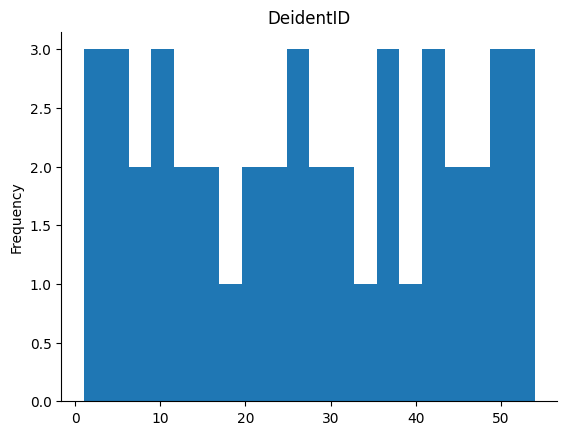

In [ ]:
from matplotlib import pyplot as plt
autoantibody_markers_data['DeidentID'].plot(kind='hist', bins=20, title='DeidentID')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Introducing the Adult Dataset**

* While the first dataset the relationship of sleep and health data among others in children, this second dataset being introduced will asses that of adults.

* The purpose of this is to understand the disease as it expands across different ages. Examining pediatric and adult data will help us to understand how glucose regulation behaves differently across different life stages and will help us to understand if we need to change treatments or interventions over time.

* Just like with the pediatric dataset, this dataset will need to be broken down and organized in a way that data visualization can occur.
The dataframes in this dataset will be very similar to those of the pediatric dataset so that comparisons and contrasts can be created for further analyzation.

* However, the adult dataset does have children in it so we will create seperate datasets that will only include adults or people 18 years or older.

* There will again be 5 dataframes representing adverse event and medication data, sleep data, health and demographic data, sensor data, and autoantibody markers.

In [ ]:
from collections.abc import AsyncGenerator
import pandas as pd

a_file = r'/content/gdrive/My Drive/CS 620 - Dataset 2 - Shawn Bryant.xlsx'

a_medication_and_adverse_data = pd.read_excel(a_file,sheet_name='NonDiabMedication')
a_sleep_data = pd.read_excel(a_file,sheet_name='NonDiabParticipantLogs')
a_health_data = pd.read_excel(a_file,sheet_name='NonDiabScreening')
a_sensor_data = pd.read_excel(a_file,sheet_name='NonDiabDeviceCGM')
a_autoantibody_markers_data = pd.read_excel(a_file,sheet_name='NonDiabSampleResults')
a_age_data = pd.read_excel(a_file,sheet_name='NonDiabPtRoster')

a_adults_only_data = a_age_data[a_age_data['AgeAsOfEnrollDt'] >= 18]
valid_id = a_adults_only_data['PtID'].unique()

valid_a_medication_and_adverse_data = a_medication_and_adverse_data[a_medication_and_adverse_data['PtID'].isin(valid_id)]
valid_a_sleep_data = a_sleep_data[a_sleep_data['PtID'].isin(valid_id)]
valid_a_health_data = a_health_data[a_health_data['PtID'].isin(valid_id)]
valid_a_sensor_data = a_sensor_data[a_sensor_data['PtID'].isin(valid_id)]
valid_a_autoantibody_markers_data = a_autoantibody_markers_data[a_autoantibody_markers_data['PtID'].isin(valid_id)]

print("Adult Autoantibody Markers Data:")
valid_a_autoantibody_markers_data.head()

print("\n")

print("Adult Age Data:")
a_adults_only_data.head()

Adult Autoantibody Markers Data:


Adult Age Data:


,RecID,PtID,SiteID,PtStatus,AgeAsOfEnrollDt
33,3,45,2,Completed,39
36,8,5,2,Completed,47
40,15,19,2,Completed,38
48,19,143,5,Completed,27
49,20,128,5,Completed,33


**Age distribution of Adults**
* Because the second dataset had children in them, they needed to be filtered out of the dataset to allow only for adults which in this case, would be anybody 18 years old or older.

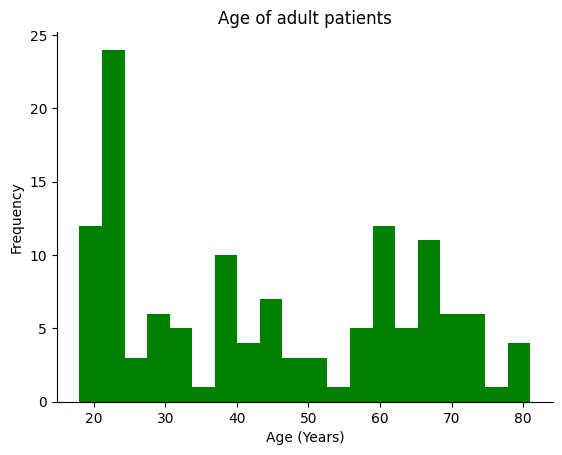

In [ ]:
from matplotlib import pyplot as plt

a_adults_only_data['AgeAsOfEnrollDt'].plot(kind='hist', bins=20, title='Age of adult patients', color='green')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

#**Preliminary Data Visualization**

* To understand the behavioral differences and potential differences in the metabolic and immune responses of adults versus children, A violin plot will be used to visualize the results of biomarkers between children and adults.

* There are 5 specific antibody markers that will be tracked:
 * **Hba1c**
 * **GAD65**
 * **IA2**
 * **IAA**
 * **ZnT8**

* Hba1c is a big indicator for long-term glucose control. This means that understanding the distribution differences between adults and children will help us to understand how to best asses metabolic health.

* GAD65, IA2, IAA, and ZnT8 are all autoantibodies associated with type 1 diabetes and their differences in distributions between adults and children can potentially show new factors that impact glucose metabolism.

**Hba1c levels between kids and adults**

 * Violinplot
 * This plot was made using seaborn and matplotlib for the charts as well as pandas to allow only adults to be used from the second dataset. The Adult dataset that is.

<ipython-input-17-ef030cde18c9>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dataset', y='Hba1c Levels', data=Hbac1Value_data, palette='magma')


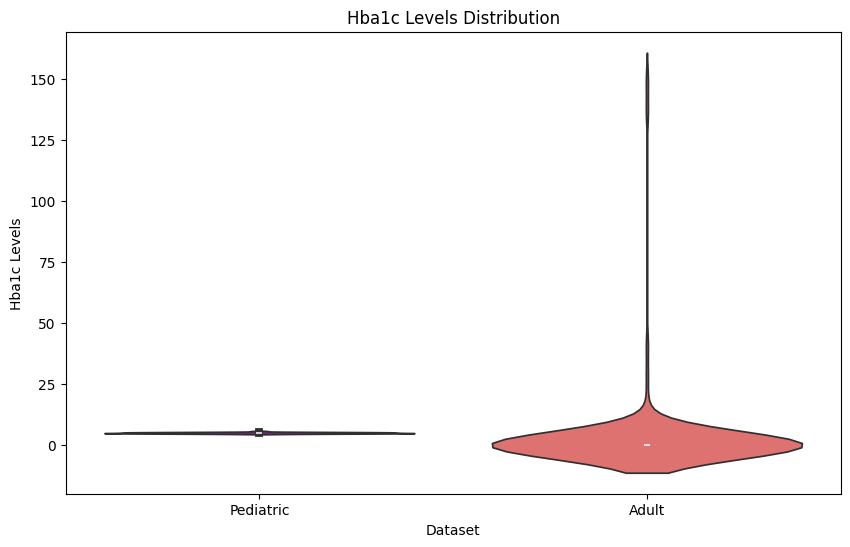

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a_age_data = pd.read_excel(a_file,sheet_name='NonDiabPtRoster')
a_adults_only_data = a_age_data[a_age_data['AgeAsOfEnrollDt'] >= 18]
valid_id = a_adults_only_data['PtID'].unique()

valid_a_autoantibody_markers_data = a_autoantibody_markers_data[a_autoantibody_markers_data['PtID'].isin(valid_id)]

p_Hbac1Value_data = autoantibody_markers_data['Hba1cValue']
a_Hbac1Value_data = pd.concat([valid_a_autoantibody_markers_data.iloc[48:94]['Value'], valid_a_autoantibody_markers_data.iloc[356:482]['Value']])


Hbac1Value_data = pd.DataFrame({'Hba1c Levels' : pd.concat([p_Hbac1Value_data, a_Hbac1Value_data], ignore_index=True),
                               'Dataset' : ['Pediatric'] * len(p_Hbac1Value_data) + ['Adult'] * len(a_Hbac1Value_data)})

plt.figure(figsize=(10,6))
sns.violinplot(x='Dataset', y='Hba1c Levels', data=Hbac1Value_data, palette='magma')

plt.title('Hba1c Levels Distribution')
plt.xlabel('Dataset')
plt.ylabel('Hba1c Levels')
plt.show()



**Hba1c conclusion**

* The adult dataset had a wider distribtution showing significantly higher Hba1c values compared to the pediatric dataset which was far more compact.

* The variability in the adult dataset hints at more uncontrolled glucose levels versus the more consistent and lower glucose levels in the pediatric dataset.


**GAD65 levels between kids and adults**

 * Violinplot
 * This plot was made using seaborn and matplotlib for the charts as well as pandas to allow only adults to be used from the second dataset. The Adult dataset that is.

<ipython-input-18-a4772909e620>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dataset', y='GAD65 Levels', data=GAD65Value_data, palette='cubehelix')


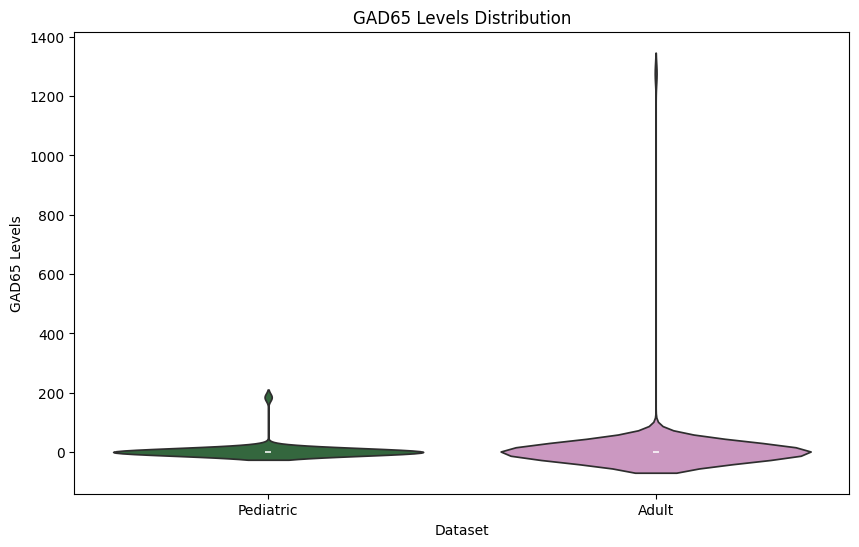

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a_age_data = pd.read_excel(a_file,sheet_name='NonDiabPtRoster')
a_adults_only_data = a_age_data[a_age_data['AgeAsOfEnrollDt'] >= 18]
valid_id = a_adults_only_data['PtID'].unique()

valid_a_autoantibody_markers_data = a_autoantibody_markers_data[a_autoantibody_markers_data['PtID'].isin(valid_id)]

p_GAD65Value_data = autoantibody_markers_data['GAD65Value']
a_GAD65Value_data = pd.concat([valid_a_autoantibody_markers_data.iloc[1:47]['Value'], valid_a_autoantibody_markers_data.iloc[229:355]['Value']])

GAD65Value_data = pd.DataFrame({'GAD65 Levels' : pd.concat([p_GAD65Value_data, a_GAD65Value_data], ignore_index=True),
                               'Dataset' : ['Pediatric'] * len(p_GAD65Value_data) + ['Adult'] * len(a_GAD65Value_data)})

plt.figure(figsize=(10,6))
sns.violinplot(x='Dataset', y='GAD65 Levels', data=GAD65Value_data, palette='cubehelix')

plt.title('GAD65 Levels Distribution')
plt.xlabel('Dataset')
plt.ylabel('GAD65 Levels')
plt.show()

**GAD65 conclusion**

* Both of the datasets were relatively low but the pediatric dataset had a sharper peak hinting at the possibility of a more clustered dataset as opposed to the more elongated and sporadic adult dataset.

* This shows that some of the adults had extreme autoimmune activity hinting at more advanced autoimmune responses as opposed to children.

**IA2 levels between kids and adults**

 * Violinplot
 * This plot was made using seaborn and matplotlib for the charts as well as pandas to allow only adults to be used from the second dataset. The Adult dataset that is.

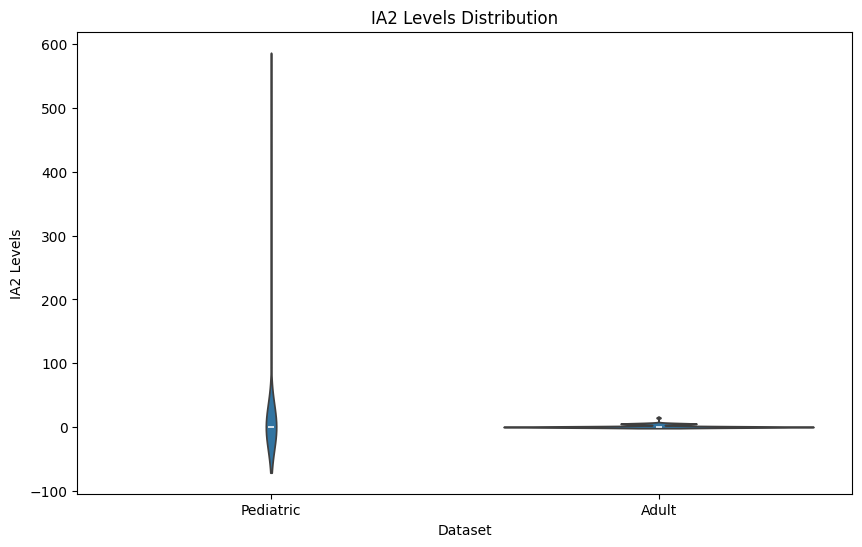

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a_age_data = pd.read_excel(a_file,sheet_name='NonDiabPtRoster')
a_adults_only_data = a_age_data[a_age_data['AgeAsOfEnrollDt'] >= 18]
valid_id = a_adults_only_data['PtID'].unique()

valid_a_autoantibody_markers_data = a_autoantibody_markers_data[a_autoantibody_markers_data['PtID'].isin(valid_id)]

p_IA2Value_data = autoantibody_markers_data['IA2Value']
a_IA2Value_data = pd.concat([valid_a_autoantibody_markers_data.iloc[95:140]['Value'], valid_a_autoantibody_markers_data.iloc[483:609]['Value']])

IA2Value_data = pd.DataFrame({'IA2 Levels' : pd.concat([p_IA2Value_data, a_IA2Value_data], ignore_index=True),
                               'Dataset' : ['Pediatric'] * len(p_IA2Value_data) + ['Adult'] * len(a_IA2Value_data)})

plt.figure(figsize=(10,6))
sns.violinplot(x='Dataset', y='IA2 Levels', data=IA2Value_data)

plt.title('IA2 Levels Distribution')
plt.xlabel('Dataset')
plt.ylabel('IA2 Levels')
plt.show()

**IA2 conclusion**

* The pediatric levels reached very high levels with some even reaching 600 but majority of the data was around 0 making the distribution very sporadic. On the other hand, the adult dataset was more compressed.

* The pediatric data hints at more unpredictable and unstable variances of immune responses in comparison to adults.

**IAA levels between kids and adults**

 * Violinplot
 * This plot was made using seaborn and matplotlib for the charts as well as pandas to allow only adults to be used from the second dataset. The Adult dataset that is.

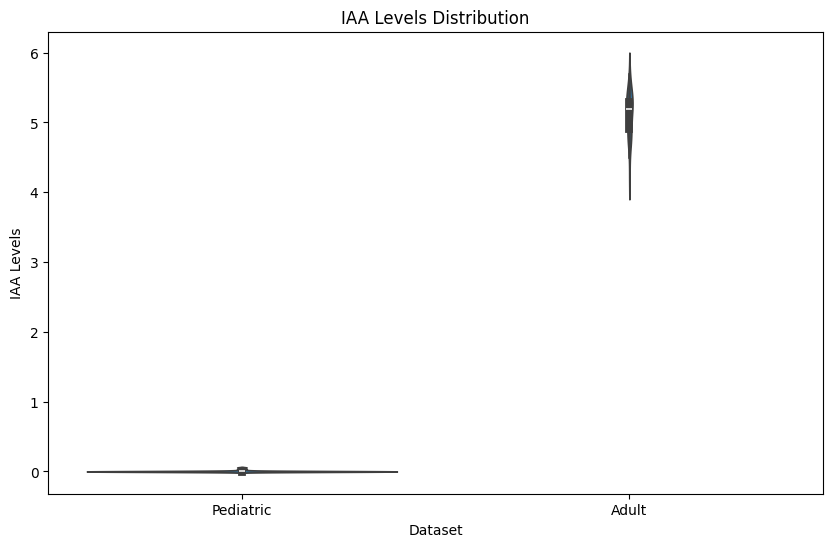

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a_age_data = pd.read_excel(a_file,sheet_name='NonDiabPtRoster')
a_adults_only_data = a_age_data[a_age_data['AgeAsOfEnrollDt'] >= 18]
valid_id = a_adults_only_data['PtID'].unique()

valid_a_autoantibody_markers_data = a_autoantibody_markers_data[a_autoantibody_markers_data['PtID'].isin(valid_id)]

p_IAAValue_data = autoantibody_markers_data['IAAValue']
a_IAAValue_data = pd.concat([valid_a_autoantibody_markers_data.iloc[141:184]['Value'], valid_a_autoantibody_markers_data.iloc[610:736]['Value']])

IAAValue_data = pd.DataFrame({'IAA Levels' : pd.concat([p_IAAValue_data, a_IAAValue_data], ignore_index=True),
                               'Dataset' : ['Pediatric'] * len(p_IAAValue_data) + ['Adult'] * len(a_IAAValue_data)})

plt.figure(figsize=(10,6))
sns.violinplot(x='Dataset', y='IAA Levels', data=IAAValue_data)

plt.title('IAA Levels Distribution')
plt.xlabel('Dataset')
plt.ylabel('IAA Levels')
plt.show()

**IAA conclusion**

* The pediatric dataset is very consistent and clustered in comparison to the adult dataset which is has significantly higher levles.

* This means that the childeren are more likely to have lower but more accurate autoimmune responses in comparison to the more sporadic and higher autoimmmne responses.

**ZnT8 levels between kids and adults**

 * Violinplot
 * This plot was made using seaborn and matplotlib for the charts as well as pandas to allow only adults to be used from the second dataset. The Adult dataset that is.

<ipython-input-19-5c950a4c8939>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dataset', y='ZnT8 Levels', data=ZnT8Value_data, palette='coolwarm')


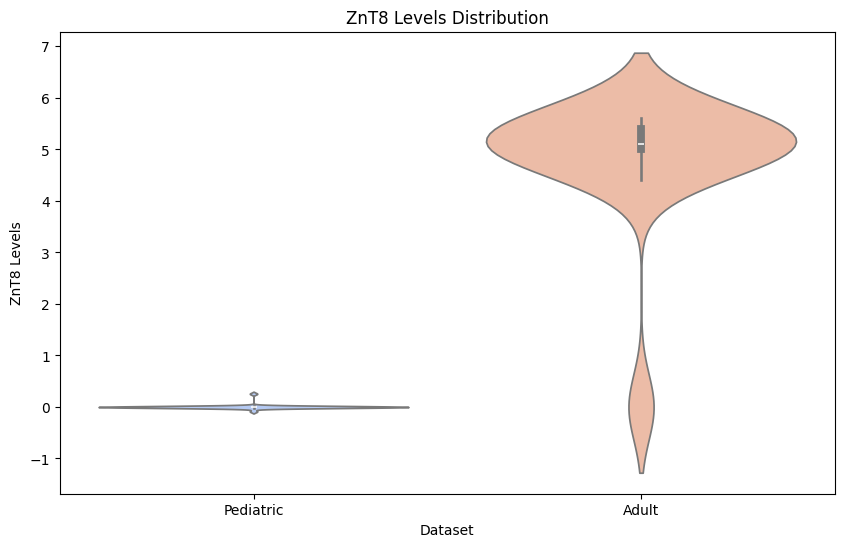

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a_age_data = pd.read_excel(a_file,sheet_name='NonDiabPtRoster')
a_adults_only_data = a_age_data[a_age_data['AgeAsOfEnrollDt'] >= 18]
valid_id = a_adults_only_data['PtID'].unique()

valid_a_autoantibody_markers_data = a_autoantibody_markers_data[a_autoantibody_markers_data['PtID'].isin(valid_id)]

p_ZnT8Value_data = autoantibody_markers_data['ZnT8Value']
a_ZnT8Value_data = pd.concat([valid_a_autoantibody_markers_data.iloc[185:228]['Value'], valid_a_autoantibody_markers_data.iloc[737:863]['Value']])

ZnT8Value_data = pd.DataFrame({'ZnT8 Levels' : pd.concat([p_ZnT8Value_data, a_ZnT8Value_data], ignore_index=True),
                               'Dataset' : ['Pediatric'] * len(p_ZnT8Value_data) + ['Adult'] * len(a_ZnT8Value_data)})

plt.figure(figsize=(10,6))
sns.violinplot(x='Dataset', y='ZnT8 Levels', data=ZnT8Value_data, palette='coolwarm')

plt.title('ZnT8 Levels Distribution')
plt.xlabel('Dataset')
plt.ylabel('ZnT8 Levels')
plt.show()

**ZnT8 conclusion**

* Very similar to the IAA test results, the pediatric dataset is very clustered and carries fairly low levels in comparison to the adult dataset which is has significantly higher levles of ZnT8.

* This means that they have the adults have more variance and higher autoimmmne responses.

**Progress I conclusion**

* Within the progress 1 period, I was able to:
 * Finalize and load in the two datasets; Adult and Pediatric datasets.
 * Load the data into their proper dataframes and start merging similar and comparable data.
 * Fine tune the Adult dataset, Data Wrangling, to drop some irrelevant rows. (Dropped rows with ages under 18)
 * Visualize data by using multiple plots until I decided on the most descriptive one for my research being the violin plot.
 * Learn about the relationships between the autoantibody markers and the different demographic groups.

* The plan for the next progress period is:
 * Continue visualizing and learning more relationships between datasets.
 * Continue the data cleaning and data wrangling process to approximate the data.
 * Start the machine learning process and testing to see how I can match the data with a potential solution.

#**Data Cleaning and Wrangling**
*  Ensure that the datasets are ready to be analyzed by removing errors, inconsistencies, and irrelevant information to create a reliable data foundation.

**Null Value check**

* Identify and handle missing values within the dataset to prevent misinformation in the anaylses and graphs/charts.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print(pd.isnull(ZnT8Value_data).sum(axis=0))
print(pd.isnull(IAAValue_data).sum(axis=0))
print(pd.isnull(IA2Value_data).sum(axis=0))
print(pd.isnull(GAD65Value_data).sum(axis=0))
print(pd.isnull(Hbac1Value_data).sum(axis=0))



ZnT8 Levels    0
Dataset        0
dtype: int64
IAA Levels    0
Dataset       0
dtype: int64
IA2 Levels    0
Dataset       0
dtype: int64
GAD65 Levels    0
Dataset         0
dtype: int64
Hba1c Levels    0
Dataset         0
dtype: int64


**Remove outliers**

 * Remove any outlying or extreme data points.
 * Data that is unique to the rest of the data may be throwing off or skewing the results and affect the graph's interpretation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

autoantibody_markers_data['Hba1cValue'] = pd.to_numeric(autoantibody_markers_data['Hba1cValue'], errors='coerce')
autoantibody_markers_data['GAD65Value'] = pd.to_numeric(autoantibody_markers_data['GAD65Value'], errors='coerce')
autoantibody_markers_data['IA2Value'] = pd.to_numeric(autoantibody_markers_data['IA2Value'], errors='coerce')
autoantibody_markers_data['IAAValue'] = pd.to_numeric(autoantibody_markers_data['IAAValue'], errors='coerce')
autoantibody_markers_data['ZnT8Value'] = pd.to_numeric(autoantibody_markers_data['ZnT8Value'], errors='coerce')
p_Hbac1Value_data = scaler.fit_transform(autoantibody_markers_data['Hba1cValue'].values.reshape(-1, 1))
p_GAD65Value_data = scaler.fit_transform(autoantibody_markers_data['GAD65Value'].values.reshape(-1, 1))
p_IA2Value_data = scaler.fit_transform(autoantibody_markers_data['IA2Value'].values.reshape(-1, 1))
p_IAAValue_data = scaler.fit_transform(autoantibody_markers_data['IAAValue'].values.reshape(-1, 1))
p_ZnT8Value_data = scaler.fit_transform(autoantibody_markers_data['ZnT8Value'].values.reshape(-1, 1))

valid_a_autoantibody_markers_data['Value'] = pd.to_numeric(valid_a_autoantibody_markers_data['Value'], errors='coerce')
a_Hbac1Value_data = scaler.fit_transform(valid_a_autoantibody_markers_data.iloc[48:94]['Value'].values.reshape(-1, 1), valid_a_autoantibody_markers_data.iloc[356:482]['Value'].values.reshape(-1, 1))
a_GAD65Value_data = scaler.fit_transform(valid_a_autoantibody_markers_data.iloc[1:47]['Value'].values.reshape(-1, 1), valid_a_autoantibody_markers_data.iloc[229:355]['Value'].values.reshape(-1, 1))
a_IA2Value_data = scaler.fit_transform(valid_a_autoantibody_markers_data.iloc[95:140]['Value'].values.reshape(-1, 1), valid_a_autoantibody_markers_data.iloc[483:609]['Value'].values.reshape(-1,1))
a_IAAValue_data = scaler.fit_transform(valid_a_autoantibody_markers_data.iloc[141:184]['Value'].values.reshape(-1, 1), valid_a_autoantibody_markers_data.iloc[610:736]['Value'].values.reshape(-1,1))
a_ZnT8Value_data = scaler.fit_transform(valid_a_autoantibody_markers_data.iloc[185:228]['Value'].values.reshape(-1, 1), valid_a_autoantibody_markers_data.iloc[737:863]['Value'].values.reshape(-1,1))





<ipython-input-23-1af059e1d507>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_a_autoantibody_markers_data['Value'] = pd.to_numeric(valid_a_autoantibody_markers_data['Value'], errors='coerce')


**Drop Unnecessary Columns**
* Drop any columns that have information irrelevant to the main goal because this makes the program less complex.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

p_columns_to_drop = ['AntibodyTestDt','IAAStatus','IA2Status','ZnT8Status','GAD65Status','Hba1cTestDt']
a_columns_to_drop = ['LastMenstCycEndDtDaysFromEnroll','LastMenstCycStartDtDaysFromEnroll','LastMenstCycEndDtUnk']
autoantibody_markers_data = autoantibody_markers_data.drop(columns=p_columns_to_drop)
valid_a_health_data = valid_a_health_data.drop(columns=a_columns_to_drop)

**Pediatric Sleep**

* Analyze the pediatric sleep data to understand the distribution and trends in sleep patterns.
* Discover the sleep pattern's potential impact on health markers.

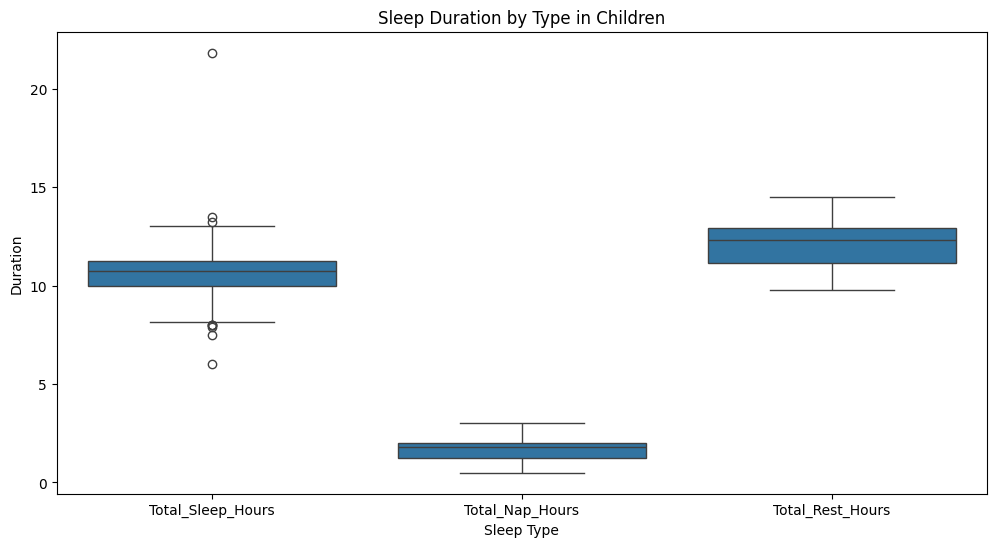

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

time_format = '%H:%M:%S'

sleep_data['Wake_Time_Tm'] = pd.to_datetime(sleep_data['Wake_Time_Tm'], format=time_format)
sleep_data['Sleep_Time_Tm'] = pd.to_datetime(sleep_data['Sleep_Time_Tm'], format=time_format)
sleep_data['Nap_SleepTime_Tm'] = pd.to_datetime(sleep_data['Nap_SleepTime_Tm'], format=time_format)
sleep_data['Nap_WakeTime_Tm'] = pd.to_datetime(sleep_data['Nap_WakeTime_Tm'], format=time_format)
#sleep_data['Total_Sleep_Hours'] = sleep_data['Wake_Time_Tm'] - sleep_data['Sleep_Time_Tm'].apply(lambda x: x if x.time() > pd.Timestamp('00:00:00').time() else x + pd.Timedelta(days=1))

sleep_data['Total_Sleep_Hours'] = sleep_data.apply(lambda row : (row['Wake_Time_Tm'] - row['Sleep_Time_Tm']).total_seconds() / 3600
    if row['Wake_Time_Tm'] >= row['Sleep_Time_Tm']
    else ((row['Wake_Time_Tm'] + timedelta(days=1)) - row['Sleep_Time_Tm']).total_seconds() / 3600, axis=1)

#sleep_data['Total_Nap_Hours'] = sleep_data['Nap_WakeTime_Tm'] - sleep_data['Nap_SleepTime_Tm']

sleep_data['Total_Nap_Hours'] = sleep_data.apply(lambda row : (row['Nap_WakeTime_Tm'] - row['Nap_SleepTime_Tm']).total_seconds() / 3600
    if row['Nap_WakeTime_Tm'] >= row['Nap_SleepTime_Tm']
    else ((row['Nap_WakeTime_Tm'] + timedelta(days=1)) - row['Nap_SleepTime_Tm']).total_seconds() / 3600, axis=1)

sleep_data['Total_Rest_Hours'] = sleep_data['Total_Sleep_Hours'] + sleep_data['Total_Nap_Hours']

melt_sleep_data = pd.melt(sleep_data, id_vars=['DeidentID'], value_vars=['Total_Sleep_Hours', 'Total_Nap_Hours', 'Total_Rest_Hours'], var_name='Sleep Type', value_name='Duration')
melt_sleep_data = melt_sleep_data.dropna()
print(melt_sleep_data)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Sleep Type', y='Duration', data=melt_sleep_data)
plt.title('Sleep Duration by Type in Children')
plt.xlabel('Sleep Type')
plt.ylabel('Duration')
plt.show()







**Adult Sleep**

* Analyze the adult sleep data to understand the distribution and trends in sleep patterns.
* Discover the sleep pattern's potential impact on health markers.
* Reveal comparable trends and distributions to contrast with the pediatric dataset
* Introduce potential age-related differences

<ipython-input-29-c2c80e1ed0b8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_a_sleep_data['Wake_Time'] = pd.to_datetime(valid_a_sleep_data['Wake_Time'], format=time_format)
<ipython-input-29-c2c80e1ed0b8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_a_sleep_data['Bedtime'] = pd.to_datetime(valid_a_sleep_data['Bedtime'], format=time_format)
<ipython-input-29-c2c80e1ed0b8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

      PtID         Sleep Type  Duration
30     143  Total_Sleep_Hours  6.666667
31     143  Total_Sleep_Hours  7.416667
32     143  Total_Sleep_Hours  9.616667
33     143  Total_Sleep_Hours  9.250000
34     143  Total_Sleep_Hours  6.750000
...    ...                ...       ...
1057   170  Total_Sleep_Hours  8.000000
1058   170  Total_Sleep_Hours  6.000000
1065   156  Total_Sleep_Hours  8.000000
1066   156  Total_Sleep_Hours  8.500000
1067   156  Total_Sleep_Hours  8.000000

[821 rows x 3 columns]


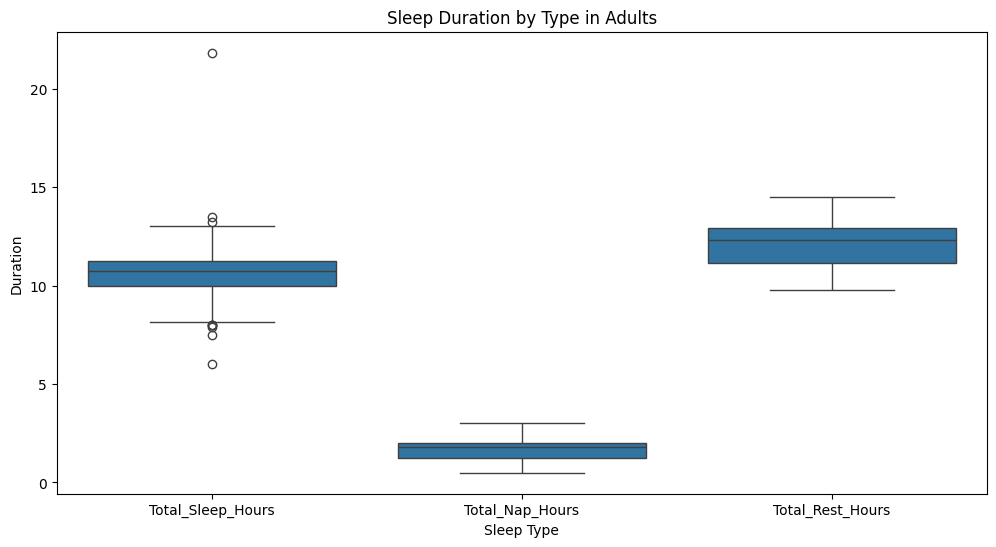

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

time_format = '%H:%M:%S'

valid_a_sleep_data['Wake_Time'] = pd.to_datetime(valid_a_sleep_data['Wake_Time'], format=time_format)
valid_a_sleep_data['Bedtime'] = pd.to_datetime(valid_a_sleep_data['Bedtime'], format=time_format)

valid_a_sleep_data['Total_Sleep_Hours'] = valid_a_sleep_data.apply(lambda row : (row['Wake_Time'] - row['Bedtime']).total_seconds() / 3600
    if row['Wake_Time'] >= row['Bedtime']
    else ((row['Wake_Time'] + timedelta(days=1)) - row['Bedtime']).total_seconds() / 3600, axis=1)

melt_a_sleep_data = pd.melt(valid_a_sleep_data, id_vars=['PtID'], value_vars=['Total_Sleep_Hours'], var_name='Sleep Type', value_name='Duration')
melt_a_sleep_data = melt_a_sleep_data.dropna()
print(melt_a_sleep_data)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Sleep Type', y='Duration', data=melt_sleep_data)
plt.title('Sleep Duration by Type in Adults')
plt.xlabel('Sleep Type')
plt.ylabel('Duration')
plt.show()

**Sleep between Children and Adults**

* The pediatric dataset is a bit less sporadic than the adult dataset suggesting that they get more sleep than adults which would make sense in a realistic society considering all of the responsibilities that adults have in comparison to children.

* This means that the childeren are more likely to have a consistent rate of rest which makes it easier and more reliable to trust their data when it is merged with the glucose data as more consistency hints at a higher accuracy rate.

**Data Linking**
* Combinine the sleep duration with glucose and other health related data data to analyze relationships between factors like sleep habits and glucose metabolism.


In [ ]:
import pandas as pd

p_merged_sleep_glucose_data = pd.merge(melt_sleep_data, autoantibody_markers_data, on=['DeidentID'], how='inner')
p_merged_sleep_glucose_data = p_merged_sleep_glucose_data.dropna()


a_merged_sleep_glucose_data = pd.merge(melt_a_sleep_data, valid_a_autoantibody_markers_data, on=['PtID'], how='inner')


p_merged_sleep_glucose_health_data = pd.merge(p_merged_sleep_glucose_data, health_data, on=['DeidentID'], how='inner')

a_merged_sleep_glucose_health_data = pd.merge(a_merged_sleep_glucose_data, valid_a_health_data, on=['PtID'], how='inner')

**Progress II conclusion**

* Within the progress 2 period, I was able to:
 * Clean out the irrelevant data in my two datasets and limit down the columns and dataframes I was going to use for my main research area.
 * Merge said dataframes based on patient and deident IDs to be able to track specific patients as well as see relationships form that will help me draw conclusions.
 * Learn about the relationships between the autoantibody markers and the different demographic groups based on sleep specifically.
 * Break sleep down into two specific types being Nap time and Sleep time in order to add context and understanding to my visualizations
 *Create visualizations comparing glucose and health data in children and adults alike to then make conclusions for glycemic health based on sleep in each respective age group.

* The plan for the next progress period is:
 * Continue the data wrangling process and wrap up my conclusions
 * Explore any and all categories to the data to ensure that there is a clear understanding of all variables affecting the glucose
 * Create final data visualizations to create visible solutions and conenctions supporting my claims.


#**Data Visualizations**

**Other Pediatric factors**
* Studies show that other factors will have an effect on glucose levels and some of these factors are affected by sleep or affect sleep as well.
* Among these, some factors include gender, body mass index, race, and even a family history can potentially interfere with glucose levels and the likelihood of diabetes developing.


**The Effects of Gender on sleep for Children**

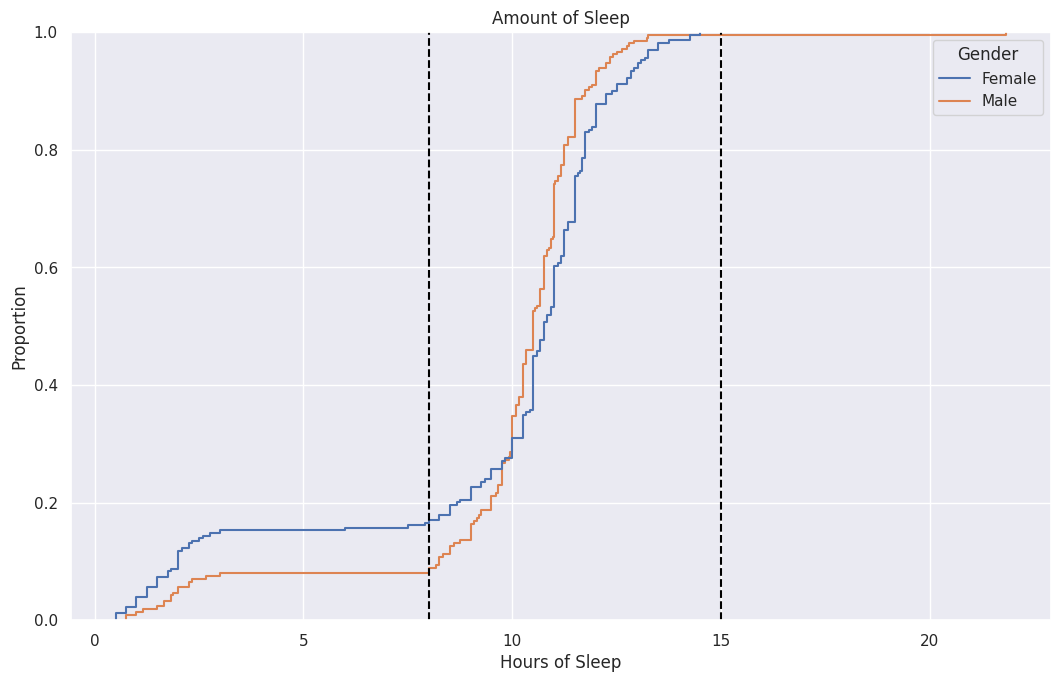

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from seaborn import axes_style


sns.set(rc={'figure.figsize':(10,6)})
ax = sns.ecdfplot(data=p_merged_sleep_glucose_health_data, x='Duration', hue='Gender')
ax.set(xlabel='Hours of Sleep',title='Amount of Sleep')
ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.axvline(x=8, color='black', linestyle='--')
plt.axvline(x=15, color='black', linestyle='--')
plt.show()

**The Effects of Diabetic Family history on sleep for Children**

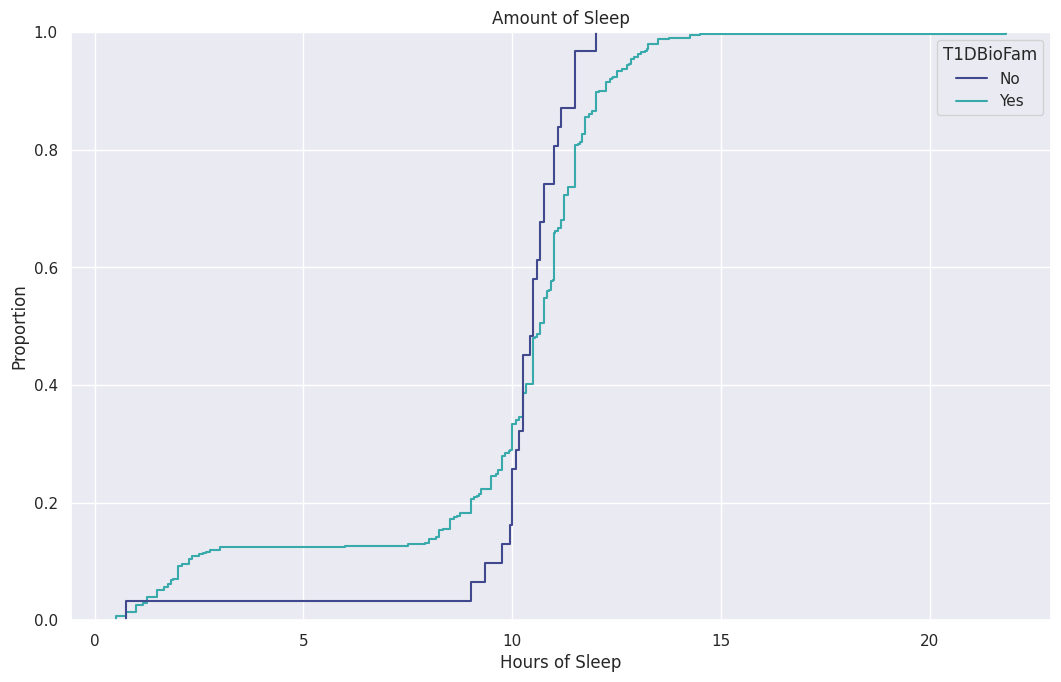

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from seaborn import axes_style

sns.set(rc={'figure.figsize':(10,6)})
ax = sns.ecdfplot(data=p_merged_sleep_glucose_health_data, x='Duration', hue='T1DBioFam', palette='mako')
ax.set(xlabel='Hours of Sleep',title='Amount of Sleep')
ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

**Gender and Diabetic family history affects on Sleep**

* As seen in the first graph, boys have on average more sleep than girls. Not much more though because the girls are very close to the boys' average.
* However, this first graph does not tell the full story. Other factors can affect sleep and glycemic levels alike such as diabetec family history which shows us that children with no diabetes in their family history tend to get more sleep on average as seen by the ecdf plot's breakdown of proportions above.

**Children Sleep and Hbac1 Level Results**
* Visualize the relationship between total sleep duration and Hba1c levels in children to assess how sleep may influence long-term blood sugar control.

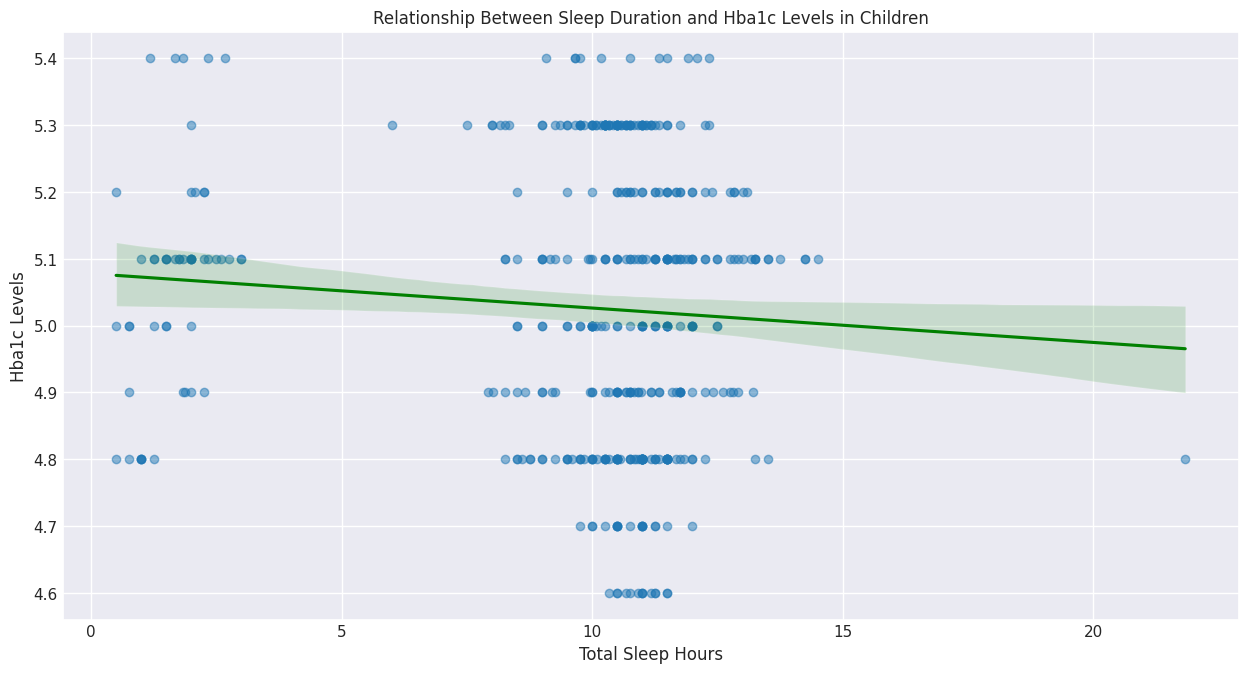

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.regplot(x='Duration',  y='Hba1cValue',  data=p_merged_sleep_glucose_data,
            scatter_kws={'alpha' : 0.5}, line_kws={'color' : 'green'})

plt.title('Relationship Between Sleep Duration and Hba1c Levels in Children')
plt.xlabel('Total Sleep Hours')
plt.ylabel('Hba1c Levels')
plt.grid(True)

plt.show()

**The Effects of BMI on Sleep and Hba1c levels**



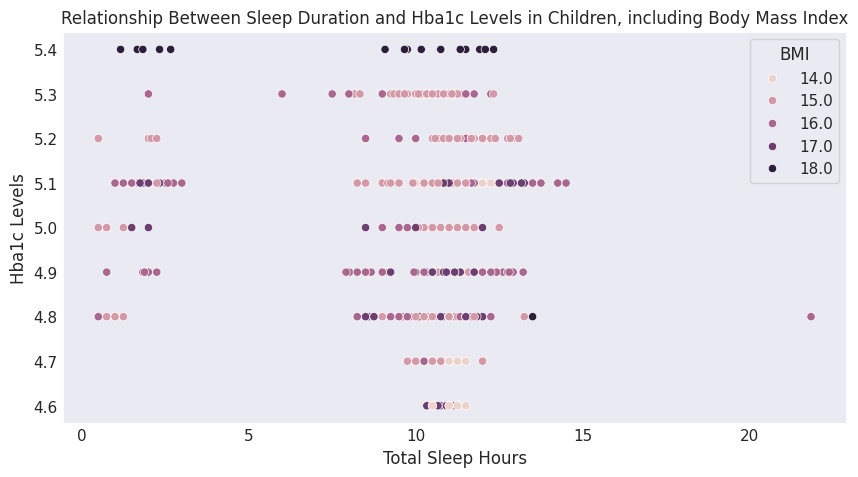

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
p_merged_sleep_glucose_health_data['BMI'] = pd.to_numeric(p_merged_sleep_glucose_health_data['BMI'], errors='coerce')

p_merged_sleep_glucose_health_data = p_merged_sleep_glucose_health_data.dropna(subset=['BMI'])

plt.figure(figsize=(8, 4))
sns.scatterplot(data=p_merged_sleep_glucose_health_data, x='Duration', y='Hba1cValue', hue=round(p_merged_sleep_glucose_health_data['BMI']))
plt.title('Relationship Between Sleep Duration and Hba1c Levels in Children, including Body Mass Index')
plt.xlabel('Total Sleep Hours')
plt.ylabel('Hba1c Levels')
plt.show()

**The Effects of Race on Hba1c levels**

<ipython-input-84-ca542ff2bfd8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race', y='Hba1cValue', data=p_merged_sleep_glucose_health_data, palette=color)


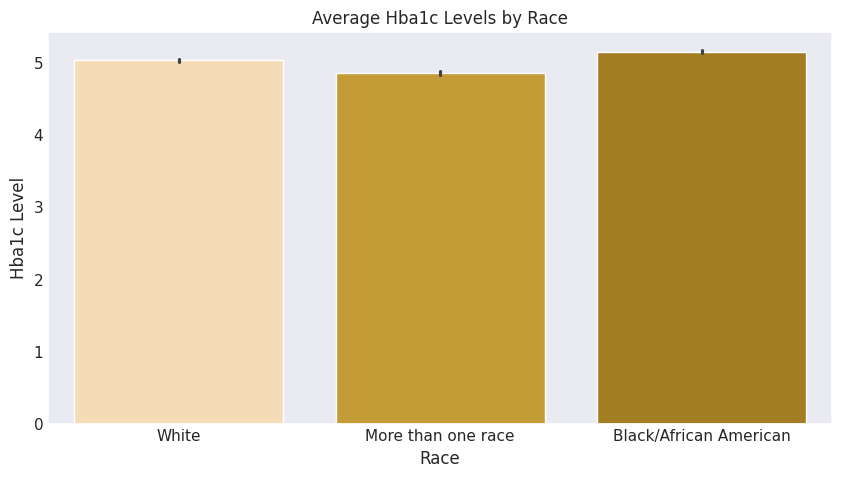

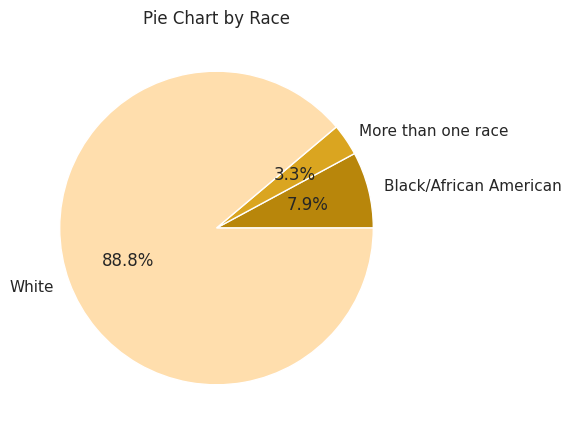

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

color = colors = ['navajowhite','goldenrod','darkgoldenrod']

plt.figure(figsize=(8, 4))
sns.barplot(x='Race', y='Hba1cValue', data=p_merged_sleep_glucose_health_data, palette=color)
plt.title('Average Hba1c Levels by Race')
plt.xlabel('Race')
plt.ylabel('Hba1c Level')
plt.show()

plt.style.use('_mpl-gallery-nogrid')
hba1c_grouped_data = p_merged_sleep_glucose_health_data.groupby('Race')['Hba1cValue'].sum()

colors = ['darkgoldenrod','goldenrod','navajowhite']

plt.figure(figsize=(8, 4))
plt.pie(hba1c_grouped_data, labels=hba1c_grouped_data.index, autopct='%1.1f%%', colors=colors)
plt.title('Pie Chart by Race')
plt.show()

**Children's Sleep and Hba1c level relationship conclusion**
* Here it is very obvious that the less hours a child gets, the higher their levels of Hba1c will be which can make the child more succeptible to type 1 diabetes.
* We also see that the BMI of the child plays part of a role with majority of the BMIs 18 and 17 being the only values that reach 5.4 and majority of the BMIs less than 15 being lower than 5.1.
* The Racial identity of these children is also seeming to have an effect on these levels as the race with the highest average level is African-Americans. However, context is needed because only they only take up 7.9%, meaning that there is a much smaller sample size which can make a drastic difference than it would with the Caucasian race.

**Children Sleep and GAD65 Level Results**
* Visualize potential associations between sleep and GAD65 antibody levels in pediatric subjects to understand immune response variations


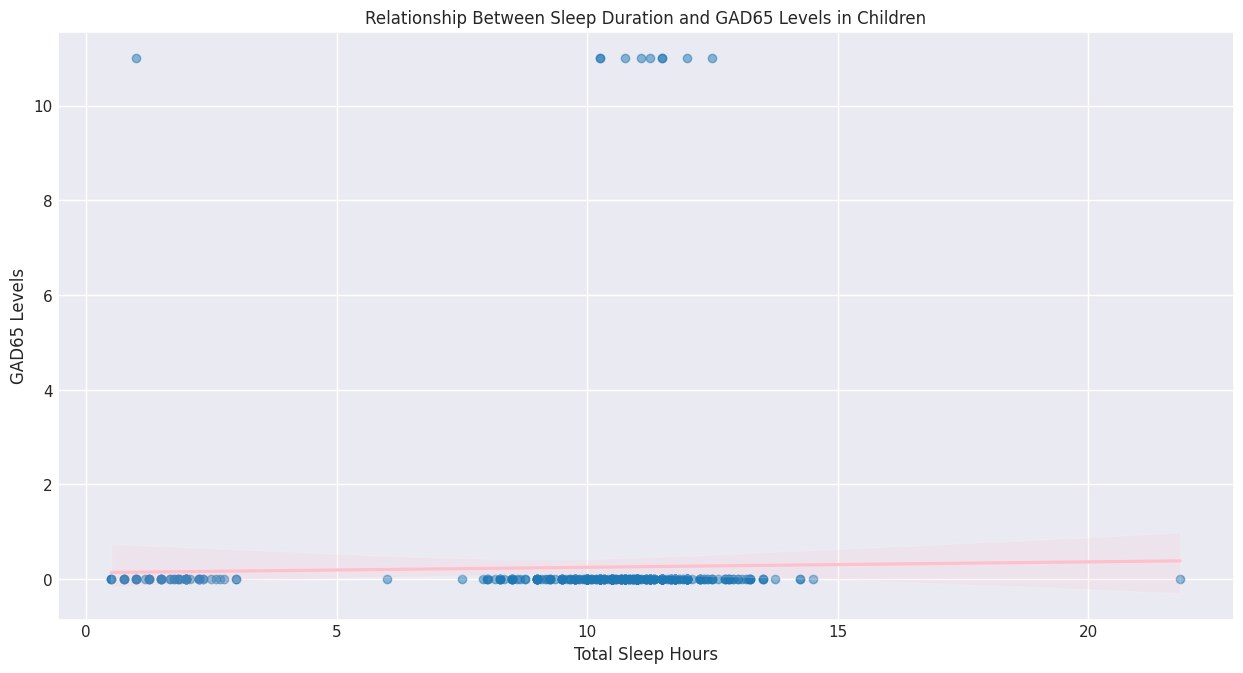

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.regplot(x='Duration',  y='GAD65Value',  data=p_merged_sleep_glucose_data,
            scatter_kws={'alpha' : 0.5}, line_kws={'color' : 'pink'})

plt.title('Relationship Between Sleep Duration and GAD65 Levels in Children')
plt.xlabel('Total Sleep Hours')
plt.ylabel('GAD65 Levels')
plt.grid(True)

plt.show()

**The Effects of BMI on Sleep and GAD65 levels**


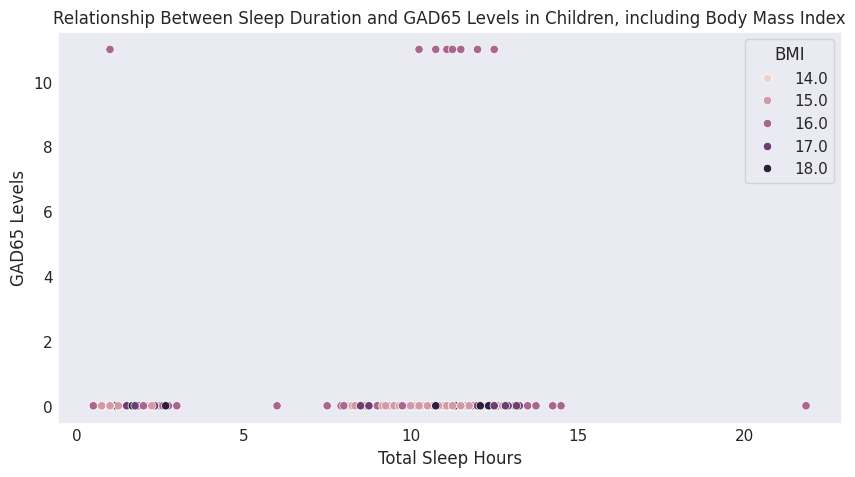

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

p_merged_sleep_glucose_health_data['BMI'] = pd.to_numeric(p_merged_sleep_glucose_health_data['BMI'], errors='coerce')
p_merged_sleep_glucose_health_data = p_merged_sleep_glucose_health_data.dropna(subset=['BMI'])

plt.figure(figsize=(8, 4))
sns.scatterplot(data=p_merged_sleep_glucose_health_data, x='Duration', y='GAD65Value', hue=round(p_merged_sleep_glucose_health_data['BMI']))
plt.title('Relationship Between Sleep Duration and GAD65 Levels in Children, including Body Mass Index')
plt.xlabel('Total Sleep Hours')
plt.ylabel('GAD65 Levels')
plt.show()

**The Effects of Race on GAD65 levels**

<ipython-input-94-40f313fed682>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race', y='GAD65Value', data=p_merged_sleep_glucose_health_data, palette=color)


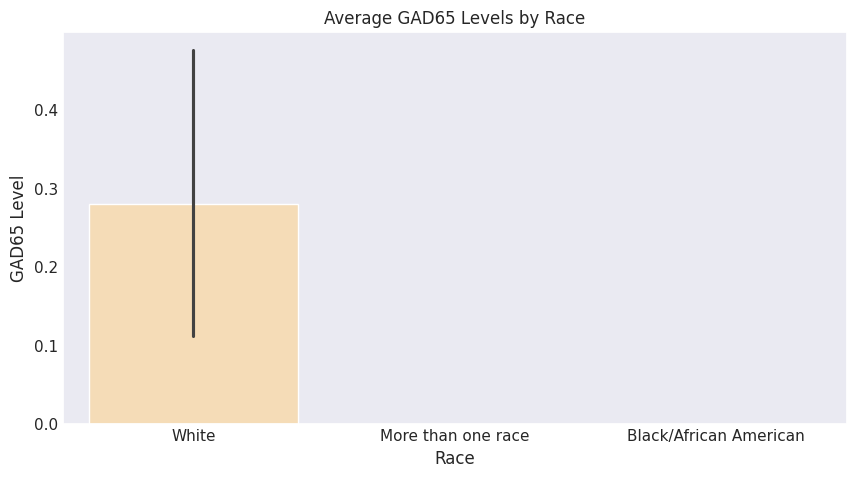

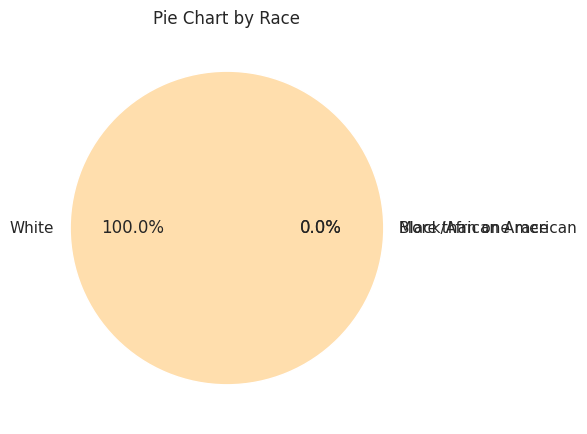

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

color = colors = ['navajowhite','goldenrod','darkgoldenrod']

plt.figure(figsize=(8, 4))
sns.barplot(x='Race', y='GAD65Value', data=p_merged_sleep_glucose_health_data, palette=color)
plt.title('Average GAD65 Levels by Race')
plt.xlabel('Race')
plt.ylabel('GAD65 Level')
plt.show()

plt.style.use('_mpl-gallery-nogrid')
gad65_grouped_data = p_merged_sleep_glucose_health_data.groupby('Race')['GAD65Value'].sum()

colors = ['darkgoldenrod','goldenrod','navajowhite']

plt.figure(figsize=(8, 4))
plt.pie(gad65_grouped_data, labels=gad65_grouped_data.index, autopct='%1.1f%%', colors=colors)
plt.title('Pie Chart by Race')
plt.show()

**Children's Sleep and GAD65 level relationship conclusion**
* Unlike with Hba1c, the less hours of sleep a child gets, the lower their levels of GAD65 which can make the child less succeptible to type 1 diabetes.
* Another thing to note here is that not all autoantibody markers are going to respond the same to each factor. An example being that there is no correlation between BMI and glucose levels here.
* Lastly, we cannot make any assumption about race because there were no GAD65 levels tracked for any race other than Caucasians.

**Children Sleep and IA2 Level Results**
*  Visualize how pediatric sleep data relates to IA2 antibody levels, which could explain autoimmune activity linked to Type 1 diabetes.

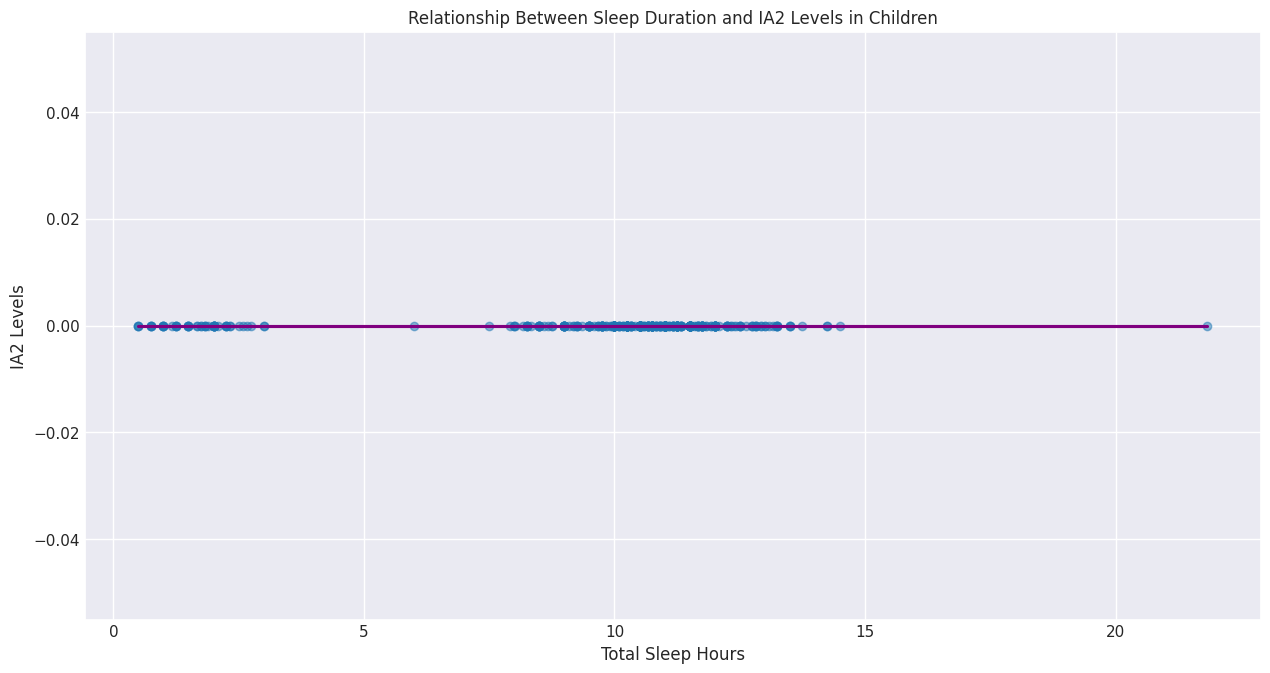

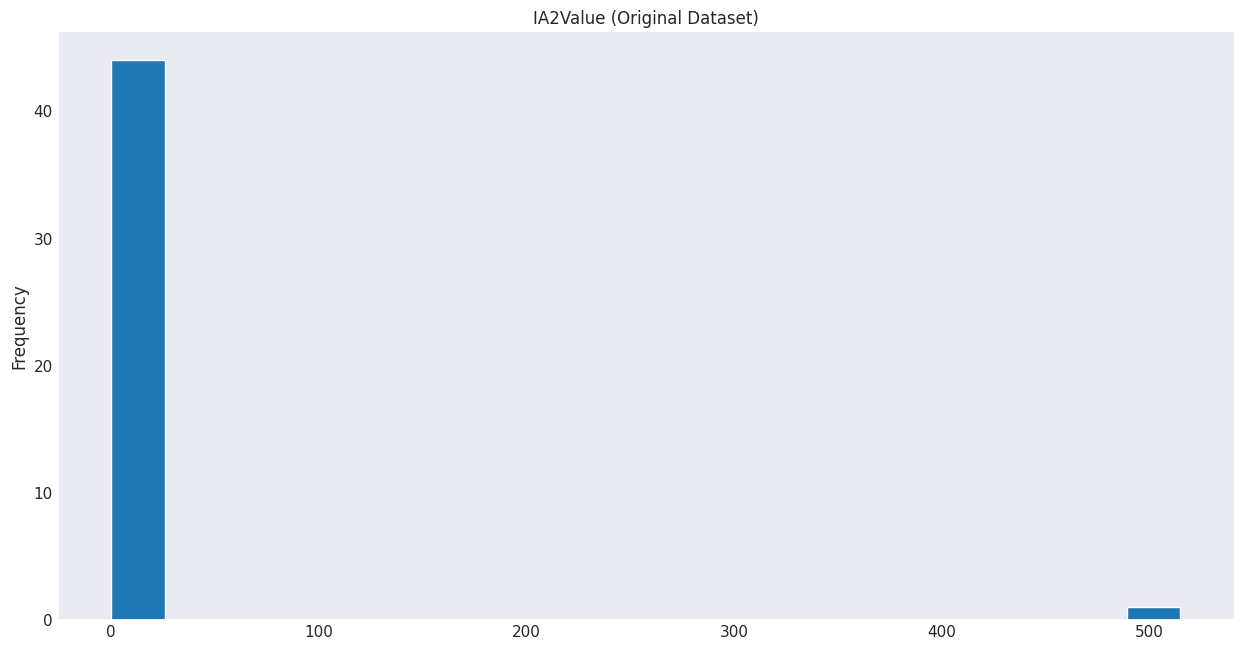

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.regplot(x='Duration',  y='IA2Value',  data=p_merged_sleep_glucose_data,
            scatter_kws={'alpha' : 0.5}, line_kws={'color' : 'purple'})

plt.title('Relationship Between Sleep Duration and IA2 Levels in Children')
plt.xlabel('Total Sleep Hours')
plt.ylabel('IA2 Levels')
plt.grid(True)

plt.show()

plt.figure(figsize=(12, 6))
autoantibody_markers_data['IA2Value'].plot(kind='hist', bins=20, title='IA2Value (Original Dataset)')
plt.gca().spines[['top', 'right',]].set_visible(False)

**The Effects of BMI on Sleep and IA2 levels**


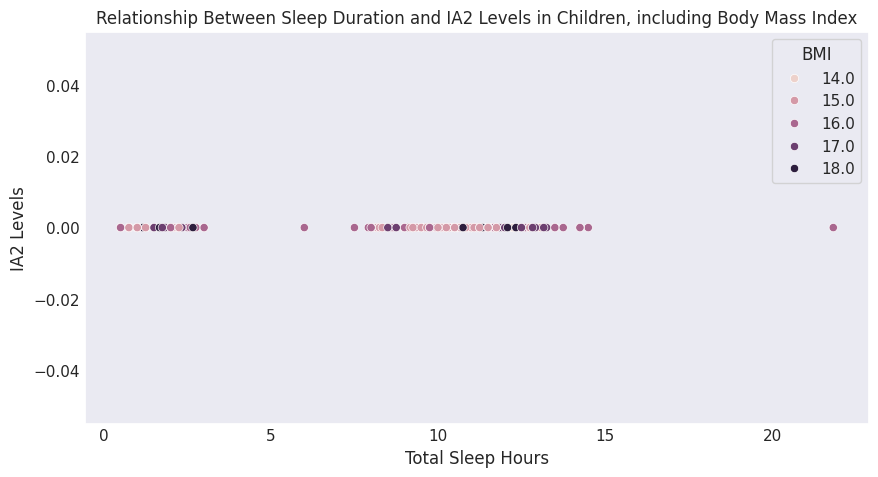

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

p_merged_sleep_glucose_health_data['BMI'] = pd.to_numeric(p_merged_sleep_glucose_health_data['BMI'], errors='coerce')
p_merged_sleep_glucose_health_data = p_merged_sleep_glucose_health_data.dropna(subset=['BMI'])

plt.figure(figsize=(8, 4))
sns.scatterplot(data=p_merged_sleep_glucose_health_data, x='Duration', y='IA2Value', hue=round(p_merged_sleep_glucose_health_data['BMI']))
plt.title('Relationship Between Sleep Duration and IA2 Levels in Children, including Body Mass Index')
plt.xlabel('Total Sleep Hours')
plt.ylabel('IA2 Levels')
plt.show()

**Children's Sleep and IA2 level relationship conclusion**
* Unfortuantely, there is not much variation at all within this dataset hence the argument that there is not enough data to make a conclusion.
* One thing to note about the data is an outlier from the original data frame that is in the 500 range. That is a dangerously high IA2 level and was so far out that it was pointless to keep it in the dataset.
* Another thing to be noted here which will also be seen with the following autonantibody markers is that the racial ethnicity data is absent. This is because the pie chart cannot handle negative values and their are negative values of these autoantibody marker levels.

**Children Sleep and IAA Level Results**
* Visualize sleep duration against IAA levels to investigate if and how sleep patterns correlate with this autoantibody in children.

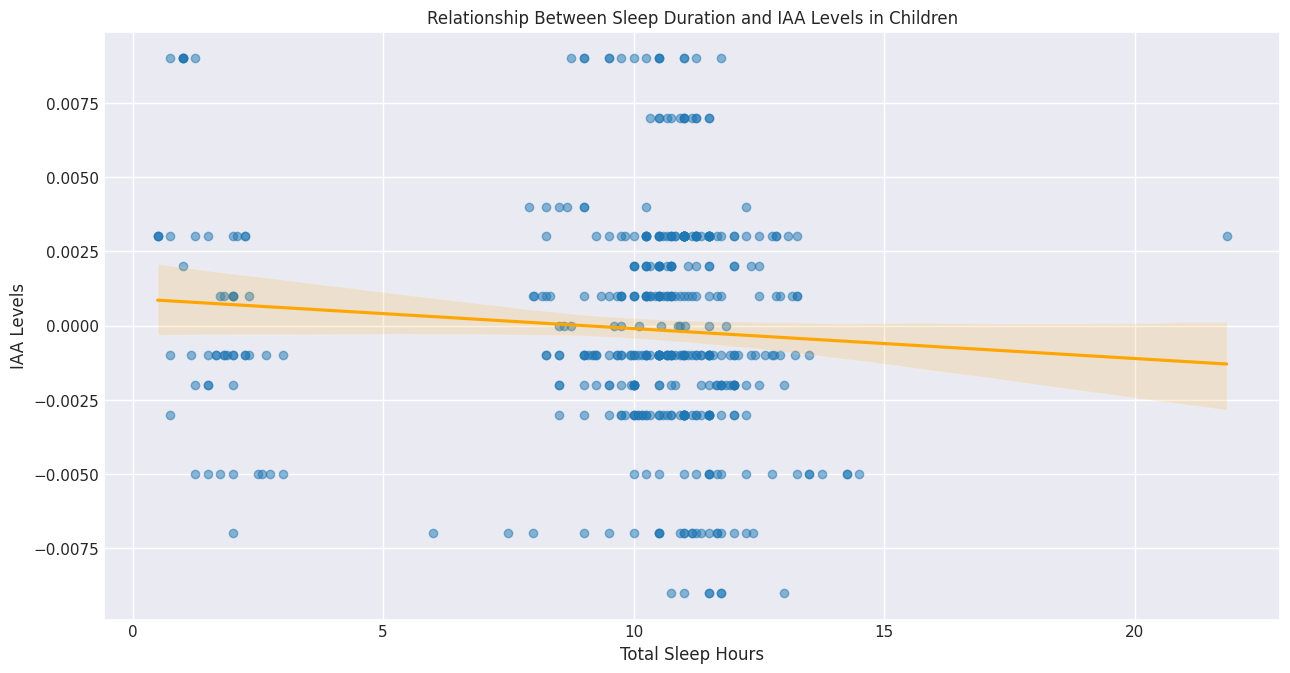

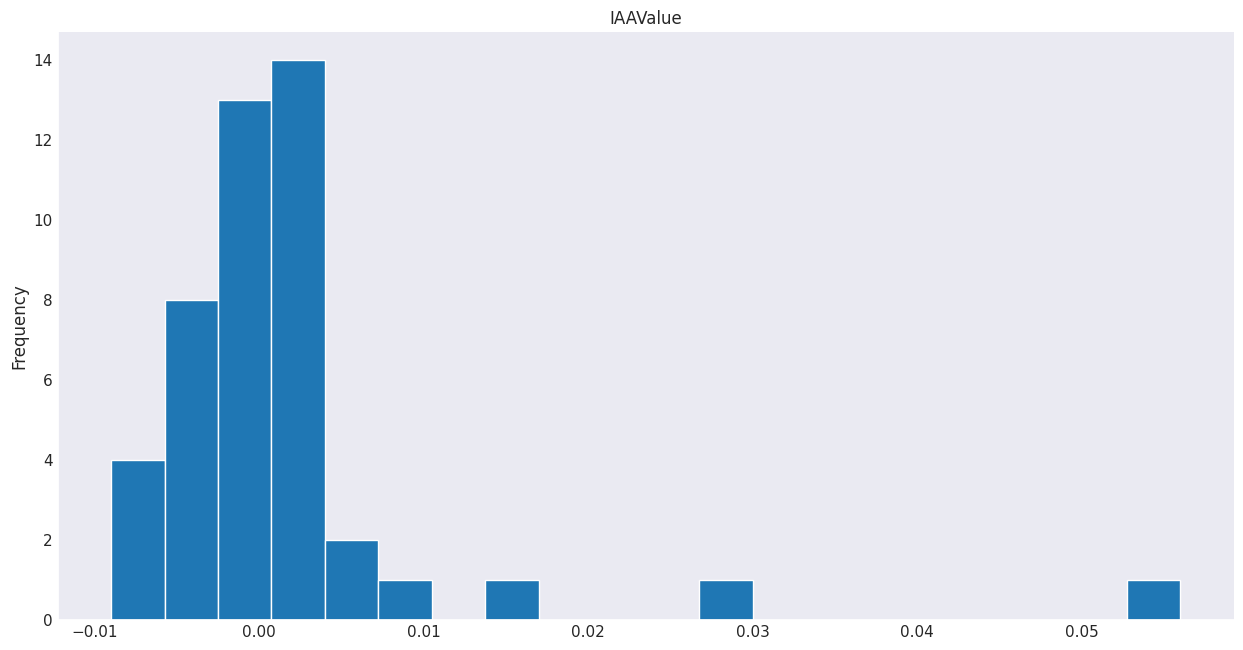

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.regplot(x='Duration',  y='IAAValue',  data=p_merged_sleep_glucose_data,
            scatter_kws={'alpha' : 0.5}, line_kws={'color' : 'orange'})

plt.title('Relationship Between Sleep Duration and IAA Levels in Children')
plt.xlabel('Total Sleep Hours')
plt.ylabel('IAA Levels')
plt.grid(True)

plt.show()

plt.figure(figsize=(12, 6))
autoantibody_markers_data['IAAValue'].plot(kind='hist', bins=20, title='IAAValue')
plt.gca().spines[['top', 'right',]].set_visible(False)

**The Effects of BMI on Sleep and IAA levels**


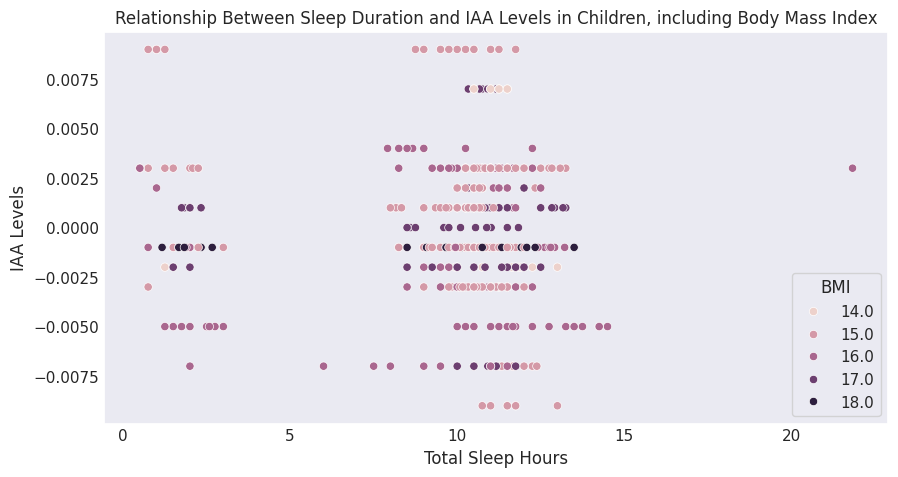

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

p_merged_sleep_glucose_health_data['BMI'] = pd.to_numeric(p_merged_sleep_glucose_health_data['BMI'], errors='coerce')
p_merged_sleep_glucose_health_data = p_merged_sleep_glucose_health_data.dropna(subset=['BMI'])

plt.figure(figsize=(8, 4))
sns.scatterplot(data=p_merged_sleep_glucose_health_data, x='Duration', y='IAAValue', hue=round(p_merged_sleep_glucose_health_data['BMI']))
plt.title('Relationship Between Sleep Duration and IAA Levels in Children, including Body Mass Index')
plt.xlabel('Total Sleep Hours')
plt.ylabel('IAA Levels')
plt.show()

**Children's Sleep and IAA level relationship conclusion**
* Although there was not enough information to draw a conclusion with the IA2 levels, there is much variation being exposed with the IAA levels and their reaction to the amount of sleep a child is getting.

* The Children that get more hours of sleep are experiencing lower levels of IAA showing that more sleep is very beneficial for the children's health overall.

**Children Sleep and ZnT8 Level Results**
* Visualize the relationship between ZnT8 antibody levels and sleep duration in pediatric data to find possible links in early autoimmune development.

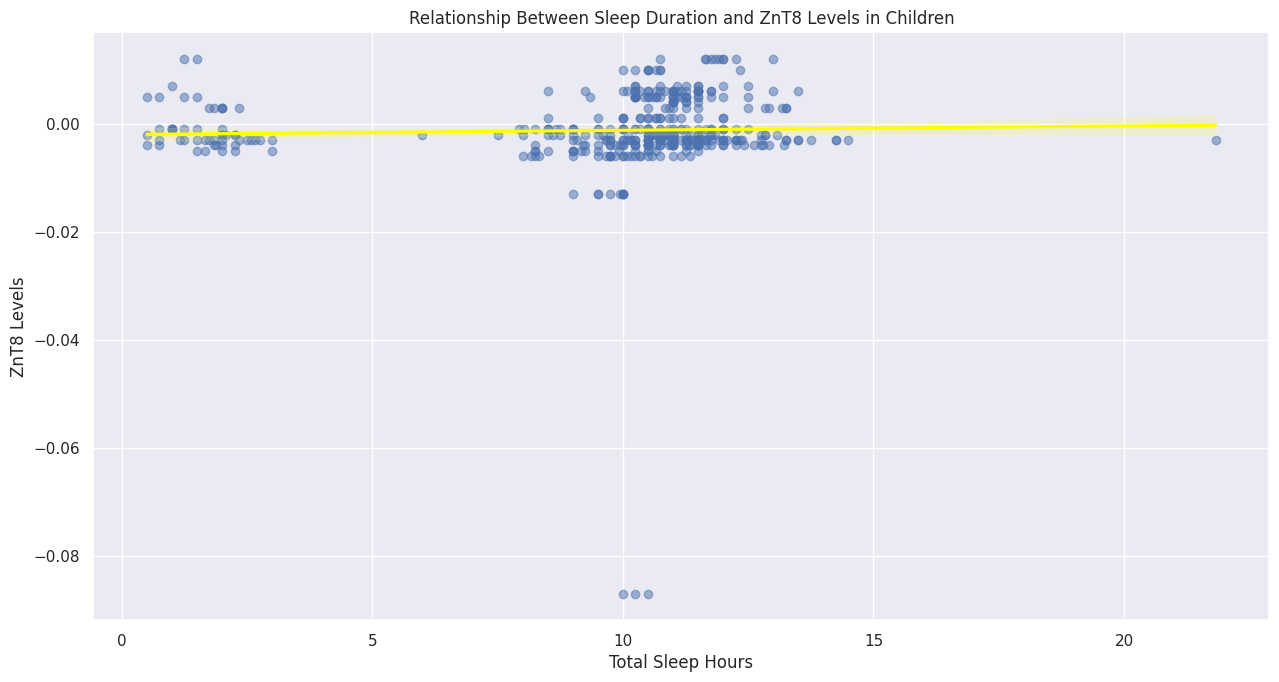

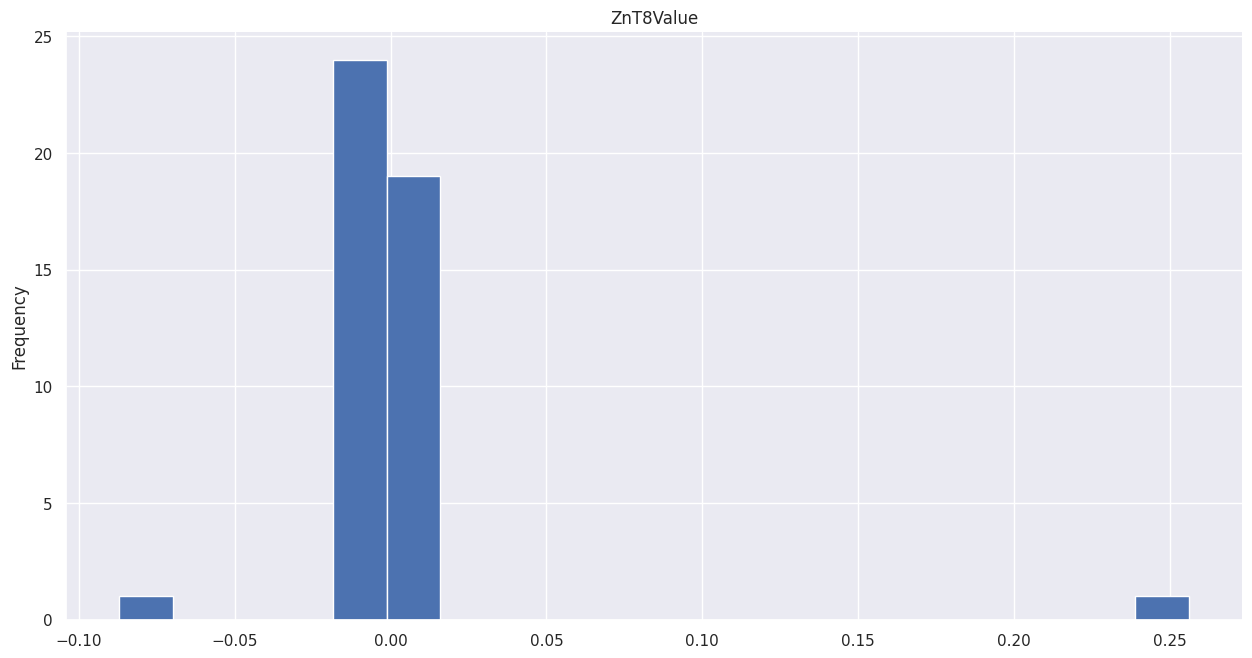

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.regplot(x='Duration',  y='ZnT8Value',  data=p_merged_sleep_glucose_data,
            scatter_kws={'alpha' : 0.5}, line_kws={'color' : 'yellow'})

plt.title('Relationship Between Sleep Duration and ZnT8 Levels in Children')
plt.xlabel('Total Sleep Hours')
plt.ylabel('ZnT8 Levels')
plt.grid(True)

plt.show()



plt.figure(figsize=(12, 6))
autoantibody_markers_data['ZnT8Value'].plot(kind='hist', bins=20, title='ZnT8Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

**The Effects of BMI on Sleep and ZnT8 levels**


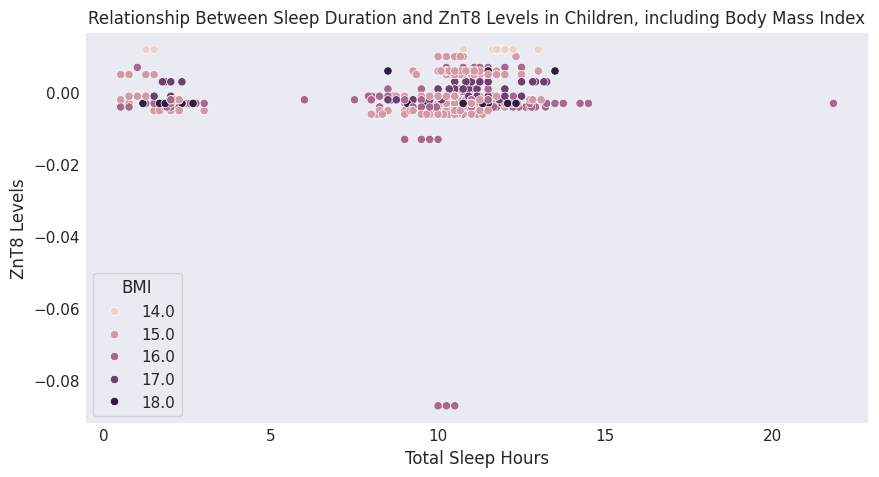

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

p_merged_sleep_glucose_health_data['BMI'] = pd.to_numeric(p_merged_sleep_glucose_health_data['BMI'], errors='coerce')
p_merged_sleep_glucose_health_data = p_merged_sleep_glucose_health_data.dropna(subset=['BMI'])

plt.figure(figsize=(8, 4))
sns.scatterplot(data=p_merged_sleep_glucose_health_data, x='Duration', y='ZnT8Value', hue=round(p_merged_sleep_glucose_health_data['BMI']))
plt.title('Relationship Between Sleep Duration and ZnT8 Levels in Children, including Body Mass Index')
plt.xlabel('Total Sleep Hours')
plt.ylabel('ZnT8 Levels')
plt.show()

**Children's Sleep and ZnT8 level relationship conclusion**
* Similar to IA2, there is not too much action happening here with the ZnT8 variance and sleep but there is enough to claim that more sleep does raise the ZnT8 levels which will in turn raise the chances of type 1 diabetes.
* Ironically, the children with the lowest BMIs have the highest ZnT8 levels.
* This is why context is important because even thought the children with the lowest BMIs have the highest levels, the standard deviation is practically 0 indicating that there is not much correlation and certaintly not enough difference to draw a definite conclusion about a potential relationship between these two factors.

**Other Adult factors**
* Studies show that other factors will have an effect on glucose levels and some of these factors are affected by sleep or affect sleep as well.
* Among these, some factors include gender, racial ethnicity, body mass index, and even a family history can potentially interfere with glucose levels and the likelihood of diabetes developing.

**The Effects of Gender on sleep for Adults**

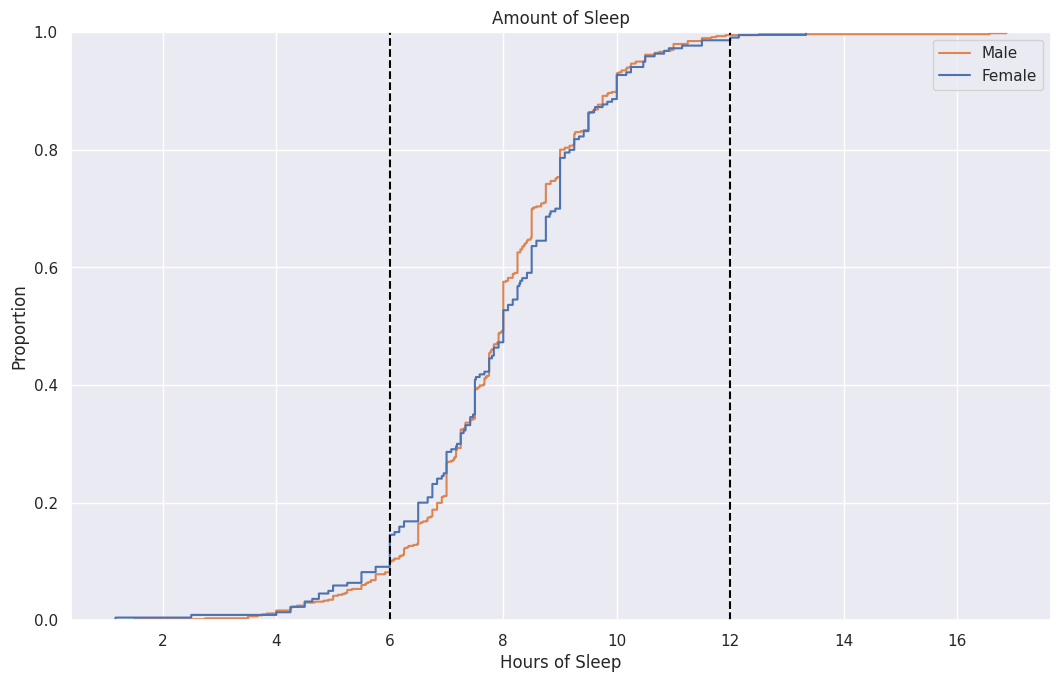

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from seaborn import axes_style

sns.set(rc={'figure.figsize':(10,6)})
ax = sns.ecdfplot(data=a_merged_sleep_glucose_health_data, x='Duration', hue='Gender')
ax.set(xlabel='Hours of Sleep',title='Amount of Sleep')
ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.axvline(x=6, color='black', linestyle='--')
plt.axvline(x=12, color='black', linestyle='--')
ax.legend(['Male','Female'])
plt.show()

**The Effects of Diabetic Family history on sleep for Adults**

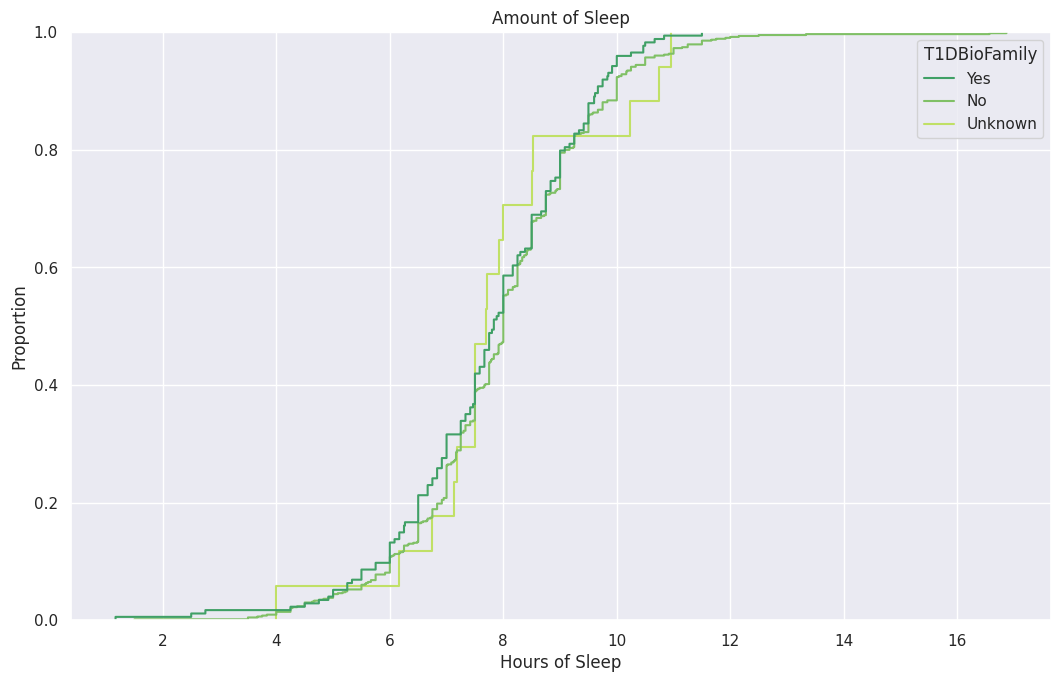

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from seaborn import axes_style

sns.set(rc={'figure.figsize':(10,6)})
ax = sns.ecdfplot(data=a_merged_sleep_glucose_health_data, x='Duration', hue='T1DBioFamily', palette='summer')
ax.set(xlabel='Hours of Sleep',title='Amount of Sleep')
ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

**Gender and Diabetic family history affects on sleep**

* With the adults, females and male have a more similar sleep rate. This is most likely due to them all being adults.
* The expectation is that majority of adults have jobs, working similar shifts, and therefore they need some sort of sleep to be able to funciton well enough to go to work.
* Children on the other hand only have school. Given that this study could have poured into the summer, surely children do not need sleep as they typically have no responsibilities in the summer.
* Once again, those who do not have diabetes in their bloodline are expected to get more sleep on average than one who does have diabetes lingering through their family tree.

**Adult Sleep and Glucose Results**
* Evaluate the correlation between sleep patterns and glucose levels in adults to identify whether there are significant metabolic effects of sleep duration in this demographic.

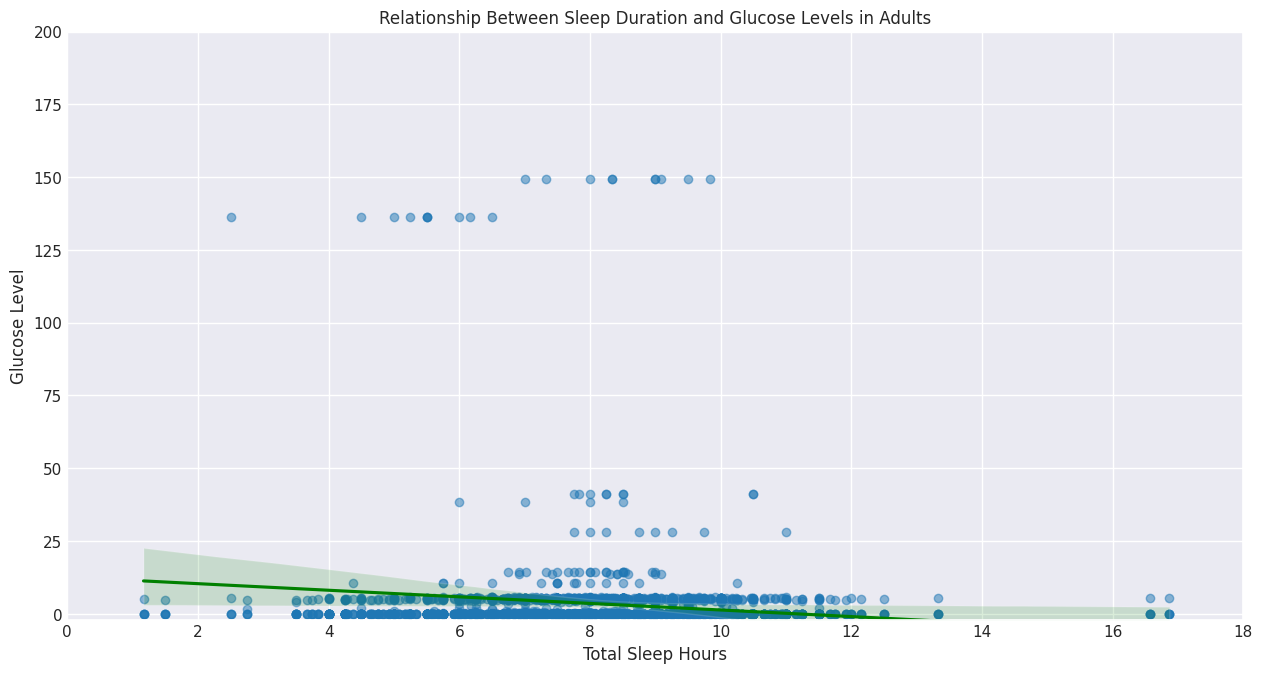

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.regplot(x='Duration',  y='Value',  data=a_merged_sleep_glucose_data,
            scatter_kws={'alpha' : 0.5}, line_kws={'color' : 'green'})

plt.title('Relationship Between Sleep Duration and Glucose Levels in Adults')
plt.xlim(0, 18)
plt.ylim(-2, 200)
plt.xlabel('Total Sleep Hours')
plt.ylabel('Glucose Level')
plt.grid(True)

plt.show()

**The Effects of BMI on Sleep and Glycemic levels**


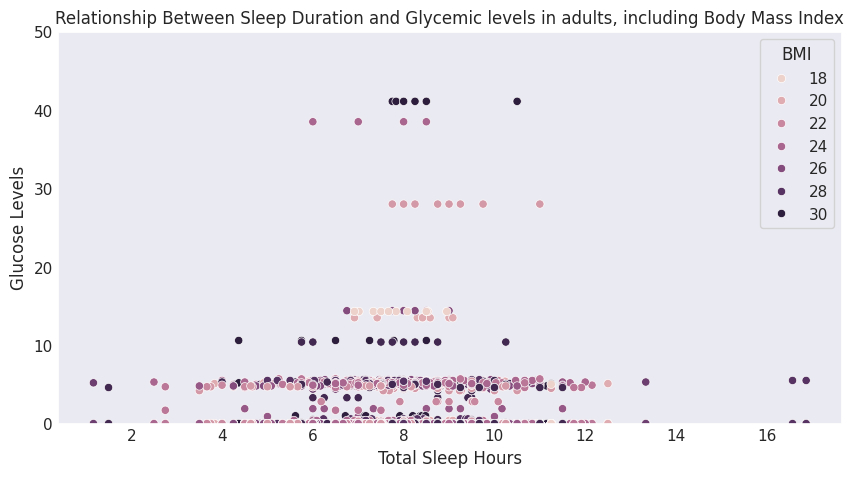

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a_merged_sleep_glucose_health_data['BMI'] = ((a_merged_sleep_glucose_health_data['Weight'] / ((a_merged_sleep_glucose_health_data['Height']) ** 2))*10000)

a_merged_sleep_glucose_health_data['BMI'] = pd.to_numeric(a_merged_sleep_glucose_health_data['BMI'], errors='coerce')

a_merged_sleep_glucose_health_data = a_merged_sleep_glucose_health_data.dropna(subset=['BMI'])

plt.figure(figsize=(8, 4))
sns.scatterplot(data=a_merged_sleep_glucose_health_data, x='Duration', y='Value', hue=round(a_merged_sleep_glucose_health_data['BMI']))
plt.title('Relationship Between Sleep Duration and Glycemic levels in adults, including Body Mass Index')
plt.ylim(0, 50)

plt.xlabel('Total Sleep Hours')
plt.ylabel('Glucose Levels')
plt.show()

**The Effects of Race on Glycemic levels**

<ipython-input-109-c69a14ebeae3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race', y='Value', data=a_merged_sleep_glucose_health_data, palette=color)


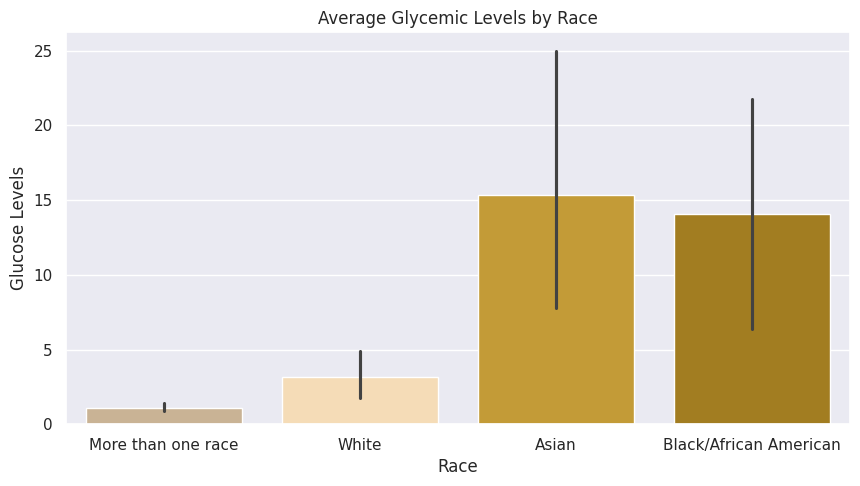

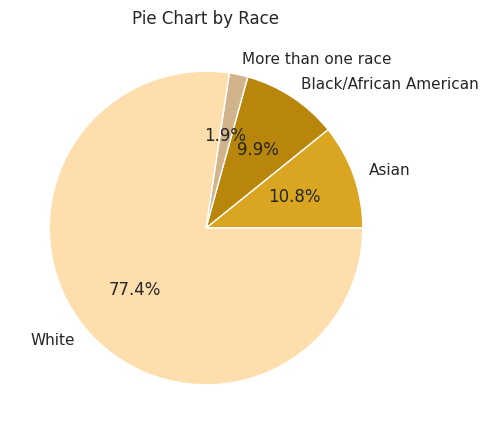

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

color = colors = ['tan','navajowhite','goldenrod','darkgoldenrod']

plt.figure(figsize=(8, 4))
sns.barplot(x='Race', y='Value', data=a_merged_sleep_glucose_health_data, palette=color)
plt.title('Average Glycemic Levels by Race')
plt.xlabel('Race')
plt.ylabel('Glucose Levels')
plt.show()

plt.style.use('_mpl-gallery-nogrid')
grouped_data = a_merged_sleep_glucose_health_data.groupby('Race')['Value'].sum()

colors = ['goldenrod','darkgoldenrod','tan','navajowhite']

plt.figure(figsize=(8, 4))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', colors=colors)
plt.title('Pie Chart by Race')
plt.show()

**Adult's Sleep and Glucose level relationship conclusion**
* Just like some of the specific autoantibodymarkers for the children's assessments, there is not too much variance occuring with the Adult's glucose levels in regard to their sleep.
* However there is a downward slope that is occuring which proves that higher levels of sleep does improve overall adult glycemic health.
* Additionally, other categories such as diabetes in family history prove to have an affect on sleep.
* Unlike with children, the males and females don't experience much difference in term of sleep which is mostly likely due to the common responsibilities both share being adults.
* Other factors such as BMI and race have also proven to have an affect on sleep with Asains averaging the highest average glycemic levels and the patients with the highest gylcemic levels all being those with the highest BMI as well. Adding context to that, not all of the patients with the highest BMIs have correlating Glycemic levels.
* However using the nearest neighbor algorithm, we can prove that it is because it wins by majority.

#**Conclusion**
* So then what does that information mean to me?
  * Why should I care about that?
  * How does that affect me as a child or adult trying to limit my chances of getting diabetes?
* Great questions!
  * We can assume that Adults are very much dependent not just on getting enough sleep, but they need to be at a healthy weight and this means having a healthy BMI to regulate their blood sugar and prevent insulin resistance. They need to be mindful of how many blood relatives they have that have had diabetes because that will genetically affect how sensitive their autoantibody markers are and how likely they are develop diabetes. They also need to be mindful of their race because all though it does not have nearly as much of an impact as the other factors do, it can serve as a catalyst to making someone prediabetic if they are struggling in other areas.

  * We can assume that children, like adults, get a healthy and consistent amount of sleep. Wherever they can get their sleep in, they need to, even if this means naps because as shown in the studies, all rest adds up. Along with this, they need to be mindful of the diabetic history of their family relatives as this can impact their likelihood of getting diabetes. They need to be mindful of their weight as the BMI can affect specific glucose levels such as Hba1c. Understanding their stance racially may seem useless but can be used as a precautionary measure whenever doing something just to ensure tht you know the risks. For example, given that African Americans have the highest likelihood out of each race, they may want to keep that in mind whenever considering something bad for their health, any symptoms coming out of nowhere and more!
* What's next then?
  * The next step would be to create a ML model showing the specific amount of sleep each child and adult would need to maintain healthy levels. The first step would be making sure that we can predict this model to gauge the parameters needed to match this data. Next, finding the optimal glucose level for each age, gender, and bmi would be the goal and the model would be used to predict the amount of sleep needed to create the optimal glucose levels to not just prevent diabetes but improve each patient's quality of life!


#**Summary**
* As seen from the scatter plots, some of the antibodies are more sensitive to variations in sleep duration than others.
* For example, sleep affects Hbac1 and GAD65 levels far more than it does ZnT8 and IA2 levels in Children.
*However, this isn't necessarily the case with adults has their sleep schedule has a significant impact on their ZnT8 levels.
* It is very clear from the graphs that gender affects the amount of sleep received from children although it does not have much impact at all on adults.
* This is likely due to the responsibilities adults have which require a certain amount of rest to allow them to have enough energy to perform their daily activities.
* There is a very strong presence felt from the association of diabetes in the families of both adults' and childrens' sleep behavior and glycemic activity.
* BMI is a selective factor that is very impactful in specific autoantibody markers like Hba1c and not so effective in others like GAD65 for children and this behavior sort of fades away as the children get older.
* This is evident because of how much more impactful BMI is in adults and is supported by the fact that as the children get older their hormones develop making them more susceptiple to diseases such as diabetes. This is part of the reason why adults are a higher risk for diabetes in the first place.
* Racial ethnicity also plays a part in this because it shows that African American Children average the highest levels of glucose among children and that Asians average the highest levels of glucose among adults.



#**Video Presentation**
[Data Science Video Presentation](https://youtu.be/aHF-Qoqozbk)

#**References**
* **[The Relationship between BMI and Onset of Diabetes Mellitus](hhttps://pmc.ncbi.nlm.nih.gov/articles/PMC4457375/)**

* **[The Link between Sleep and Diabetes](https://pmc.ncbi.nlm.nih.gov/articles/PMC10693913/#:~:text=According%20to%20a%20study%20%5B22,glucose%2C%20and%20HOMA%2DIR.)**

* ****